In [206]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import math

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
#from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder

In [207]:
pd.set_option('display.max_columns', None)

# Импорт данных

In [208]:
df_domclick = pd.read_csv("domclick/Екатеринбург_domclick_dataset.csv", sep = ";")
df_domclick.info()
df_domclick.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3014 entries, 0 to 3013
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             3014 non-null   int64  
 1   region                         3014 non-null   object 
 2   address                        3014 non-null   object 
 3   latitude                       3014 non-null   float64
 4   longitude                      3014 non-null   float64
 5   price                          3014 non-null   int64  
 6   house_floors                   3014 non-null   int64  
 7   house_buildYear                3014 non-null   object 
 8   house_ceilingHeight            3014 non-null   object 
 9   house_hasGarbageDisposer       1705 non-null   object 
 10  house_liftsFreight             1611 non-null   float64
 11  house_liftsPassenger           1919 non-null   float64
 12  house_wallType                 2979 non-null   o

,id,region,address,latitude,longitude,price,house_floors,house_buildYear,house_ceilingHeight,house_hasGarbageDisposer,house_liftsFreight,house_liftsPassenger,house_wallType,house_areaCommonPropery,house_areaNonResidential,house_areaResidential,house_basementArea,house_chuteCount,house_coldWaterType,house_electricalEntriesCount,house_electricalType,house_elevatorsCount,house_energyEfficiency,house_entranceCount,house_fireFightingType,house_floorType,house_foundationType,house_heatingType,house_parkingSquare,house_sewerageCesspoolsVolume,house_sewerageType,house_ventilationType,saleType,objectInfo_rooms,objectInfo_area,objectInfo_kitchenArea,objectInfo_livingArea,objectInfo_floor,objectInfo_connectedBathrooms,objectInfo_separatedBathrooms,objectInfo_balconies,objectInfo_hasGas,objectInfo_renovation,objectInfo_loggias
0,1905563415,Екатеринбург,"улица Белинского, 218к2",56.80170,60.62653,6800000,5,1970,undefined,False,NaN,0.00000,Кирпичный,3253.6,57.4,5994.7,1636.6,NaN,Центральное,2,Центральное,NaN,Не присвоен,8,Пожарные гидранты,Железобетонный,Ленточный,Центральное,212,0,Центральное,Приточно-вытяжная,Свободная продажа,3,55,7.00000,0.00000,2,1,undefined,1,True,Дизайнерский,NaN
1,1851195009,Екатеринбург,"улица Крестинского, 35",56.78992,60.61735,4990000,16,2018,undefined,NaN,NaN,NaN,Монолитный,64.5,NaN,60,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,Железобетонный,NaN,NaN,NaN,NaN,NaN,NaN,Свободная продажа,0,58,0.00000,0.00000,15,1,undefined,0,NaN,Евро,NaN
2,1832572118,Екатеринбург,"улица Азина, 22/7",56.85625,60.60961,11800000,36,2022,undefined,NaN,NaN,NaN,Монолитно-кирпичный,28,NaN,25433.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Железобетонный,NaN,NaN,NaN,NaN,NaN,NaN,Свободная продажа,2,73,12.00000,54.00000,5,undefined,2,1,NaN,undefined,NaN
3,1831906417,Екатеринбург,"улица Шаумяна, 107",56.81739,60.55833,5600000,9,1969,undefined,True,NaN,1.00000,Панельный,627.1,307.7,7255.2,1026.1,1,Центральное,2,Центральное,4,Не присвоен,4,NaN,Железобетонный,Ленточный,Центральное,0,NaN,Центральное,Приточная,Свободная продажа,3,58,6.00000,40.00000,4,undefined,1,0,True,Косметический,1.00000
4,1809740017,Екатеринбург,"Техническая улица, 142",56.88032,60.50678,3600000,4,1962,undefined,NaN,NaN,NaN,Кирпичный,108,0,1258.3,443.5,NaN,Центральное,1,Центральное,NaN,Не присвоен,2,NaN,Железобетонный,Ленточный,Центральное,NaN,NaN,Центральное,Приточно-вытяжная,Свободная продажа,2,42.6,5.40000,28.50000,3,1,undefined,1,True,Евро,NaN


In [209]:
df_cian = pd.read_csv("cian/data_home_ecb.csv")
df_cian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26680 entries, 0 to 26679
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 26680 non-null  object 
 1   price                26680 non-null  int64  
 2   price_for_metr       26680 non-null  int64  
 3   floor_object         26680 non-null  int64  
 4   total_floors         26680 non-null  int64  
 5   type_of_home         26680 non-null  object 
 6   square_home          26680 non-null  float64
 7   live_square          26680 non-null  object 
 8   kitchen_square       26680 non-null  object 
 9   height_ceiling       26680 non-null  object 
 10  bathroom             26680 non-null  object 
 11  balcony              26680 non-null  object 
 12  repair               26680 non-null  object 
 13  yer_home             26680 non-null  object 
 14  garbage_chute        26680 non-null  object 
 15  type_home            26680 non-null 

In [210]:
df_cian.head()

,name,price,price_for_metr,floor_object,total_floors,type_of_home,square_home,live_square,kitchen_square,height_ceiling,bathroom,balcony,repair,yer_home,garbage_chute,type_home,type_of_overlap,entrances,heating,accident_rate,gas_supply,finishing,number_of_elevators,address,link
0,1-комн. квартира,1290000,103200,1,5,Вторичка,12.50000,Null,3.0,Null,1,Null,Косметический,1970,Null,Кирпичный,Железобетонные,3,Центральное,Нет,Null,Null,Null,"Свердловская область, Екатеринбург, р-н Октябр...",https://ekb.cian.ru/sale/flat/291299914/
1,1/3 квартиры,1250000,26596,18,27,Вторичка,47.00000,16.0,7.0,Null,1,1,Без ремонта,2016,Null,Монолитный,Железобетонные,1,Автономная котельная,Нет,Центральное,Null,2,"Свердловская область, Екатеринбург, р-н Чкалов...",https://ekb.cian.ru/sale/flat/292802600/
2,2-комн. квартира,1300000,33679,2,2,Вторичка,38.60000,Null,5.0,Null,Null,Null,Косметический,1974,Null,Null,Деревянные,1,Котел/Квартирное отопление,Нет,Центральное,Null,Null,"Свердловская область, Екатеринбург, р-н Железн...",https://ekb.cian.ru/sale/flat/293369582/
3,Студия,1300000,89041,1,5,Вторичка,14.60000,5.4,4.2,Null,1,Null,Косметический,1970,Нет,Кирпичный,Железобетонные,3,Центральное,Нет,Null,Null,Null,"Свердловская область, Екатеринбург, р-н Октябр...",https://ekb.cian.ru/sale/flat/290968737/
4,3-комн. квартира,1200000,15385,11,12,Вторичка,78.00000,45.0,Null,2.6,1,1,Без ремонта,1989,Null,Кирпичный,Железобетонные,8,Центральное,Нет,Центральное,Null,2,"Свердловская область, Екатеринбург, р-н Кировс...",https://ekb.cian.ru/sale/flat/294520470/


# Подготовка данных

In [211]:
df_domclick = df_domclick.replace('undefined', np.nan)
df_domclick['objectInfo_kitchenArea'] = df_domclick['objectInfo_kitchenArea'].replace(0, np.nan)
df_domclick['objectInfo_livingArea'] = df_domclick['objectInfo_livingArea'].replace(0, np.nan)

In [212]:
df_domclick.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3014 entries, 0 to 3013
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             3014 non-null   int64  
 1   region                         3014 non-null   object 
 2   address                        3014 non-null   object 
 3   latitude                       3014 non-null   float64
 4   longitude                      3014 non-null   float64
 5   price                          3014 non-null   int64  
 6   house_floors                   3014 non-null   int64  
 7   house_buildYear                3000 non-null   object 
 8   house_ceilingHeight            1191 non-null   object 
 9   house_hasGarbageDisposer       1705 non-null   object 
 10  house_liftsFreight             1611 non-null   float64
 11  house_liftsPassenger           1919 non-null   float64
 12  house_wallType                 2927 non-null   o

In [213]:
df_cian = df_cian.drop_duplicates(keep = 'last')
df_cian = df_cian.replace('Null', np.nan)
df_cian = df_cian.replace('Нет информации', np.nan)
df_cian.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11274 entries, 0 to 26679
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 11274 non-null  object 
 1   price                11274 non-null  int64  
 2   price_for_metr       11274 non-null  int64  
 3   floor_object         11274 non-null  int64  
 4   total_floors         11274 non-null  int64  
 5   type_of_home         11274 non-null  object 
 6   square_home          11274 non-null  float64
 7   live_square          7323 non-null   object 
 8   kitchen_square       7980 non-null   object 
 9   height_ceiling       7408 non-null   object 
 10  bathroom             6691 non-null   object 
 11  balcony              6256 non-null   object 
 12  repair               5298 non-null   object 
 13  yer_home             5334 non-null   object 
 14  garbage_chute        1118 non-null   object 
 15  type_home            9918 non-null   obje

In [214]:
df_cian['name'].unique()

array(['1-комн. квартира', '1/3 квартиры', '2-комн. квартира', 'Студия',
       '3-комн. квартира', '1/2 квартиры', '2/3 квартиры',
       '1-комн. апартаменты', 'Квартира свободной планировки',
       '3/5 квартиры', '3/4 квартиры', '3/8 квартиры',
       'Апартаменты-студия', '2-комн. апартаменты', '0',
       '4-комн. квартира', 'Доля', '5-комн. квартира',
       '3-комн. апартаменты', 'Апартаменты свободной планировки',
       'Многокомнатная квартира', '4-комн. апартаменты'], dtype=object)

In [215]:
df_cian = df_cian.drop(df_cian[df_cian.name.str.contains('%') | df_cian.name.str.contains('/') | df_cian.name.str.contains('Много') 
                       | df_cian.name.str.contains('Доля') | df_cian.name.str.contains('0') | df_cian.name.str.contains('свободной')].index)

In [216]:
df_cian['name'].unique()

array(['1-комн. квартира', '2-комн. квартира', 'Студия',
       '3-комн. квартира', '1-комн. апартаменты', 'Апартаменты-студия',
       '2-комн. апартаменты', '4-комн. квартира', '5-комн. квартира',
       '3-комн. апартаменты', '4-комн. апартаменты'], dtype=object)

In [217]:
df_cian['room_count'] = df_cian.name.str[:1]
df_cian['room_count'] = df_cian['room_count'].str.replace('А','0')
df_cian['room_count'] = df_cian['room_count'].str.replace('С','0')
df_cian['room_count'].unique()

array(['1', '2', '0', '3', '4', '5'], dtype=object)

In [218]:
df_domclick['objectInfo_renovation'].unique()

array(['Дизайнерский', 'Евро', nan, 'Косметический',
       'Ремонт от застройщика', 'Ремонт', 'Евроремонт',
       'Косметический ремонт', 'Без ремонта', 'косметический',
       'Требует ремонта', 'евроремонт', 'С отделкой', 'Частичный ремонт',
       'Хороший', 'Отсутствует'], dtype=object)

In [219]:
df_cian['repair'].unique()

array(['Косметический', 'Без ремонта', 'Евроремонт', 'Дизайнерский', nan],
      dtype=object)

In [220]:
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('косметический', 'Косметический')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('косметический ремонт', 'Косметический')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Косметический ремонт', 'Косметический')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('После косметического ремонта', 'Косметический')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Дизайнерский ремонт', 'Дизайнерский')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Евростандарт', 'Евроремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Евро', 'Евроремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('евроремонт', 'Евроремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('euro', 'Евроремонт')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Отсутствует', 'Без ремонта')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('no', 'Без ремонта')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Предчистовая', 'Предчистовая отделка')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('предчистовая', 'Предчистовая отделка')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требуется ремонт', 'Требует ремонта')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требуется', 'Требует ремонта')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требуется косметический ремонт', 'Требует ремонта')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требуется капитальный ремонт', 'Требует ремонта')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('устаревший ремонт', 'Требует ремонта')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требуется легкий ремонт', 'Требует ремонта')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требуется внутренняя отделка', 'Под чистовую отделку')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Под чистовой ремонт', 'Под чистовую отделку')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('С отделкой', 'Под чистовую отделку')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('черновая', 'Под чистовую отделку')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('высококачественная отделка', 'Чистовая отделка')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('чистовая отделка', 'Чистовая отделка')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('чистовая', 'Чистовая отделка')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('После ремонта', 'Стандартный ремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Ремонт', 'Стандартный ремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('стандартный ремонт', 'Стандартный ремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Ремонт от застройщика', 'Стандартный ремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Хороший', 'Стандартный ремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('полная', 'Стандартный ремонт')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('под отделку', 'Под ключ')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('под ключ', 'Под ключ')

In [221]:
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Косметический', '1')
df_cian['repair'] = df_cian['repair'].replace('Косметический', '1')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Без ремонта', '0')
df_cian['repair'] = df_cian['repair'].replace('Без ремонта', '0')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Евроремонт', '2')
df_cian['repair'] = df_cian['repair'].replace('Евроремонт', '2')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Дизайнерский', '3')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Авторский проект', '3')
df_cian['repair'] = df_cian['repair'].replace('Дизайнерский', '3')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Под чистовую отделку', '4')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требует ремонта', '5')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Чистовая отделка', '6')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Под ключ', '7')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Предчистовая отделка', '8')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Стандартный ремонт', '9')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Частичный ремонт', '10')

In [222]:
df_cian['repair'].unique()

array(['1', '0', '2', '3', nan], dtype=object)

In [223]:
df_domclick['objectInfo_renovation'].unique()

array(['3', '2', nan, '1', '9', '0', '5', '4', '10'], dtype=object)

In [224]:
df_domclick['house_wallType'].unique()

array(['Кирпичный', 'Монолитный', 'Монолитно-кирпичный', 'Панельный',
       'Блочный', 'Иные', 'Смешанные', 'Железобетон', nan,
       'Кирпично-монолитный', 'Деревянный'], dtype=object)

In [225]:
df_cian['type_home'].unique()

array(['Кирпичный', nan, 'Блочный', 'Деревянный', 'Панельный',
       'Монолитный', 'Монолитно-кирпичный', 'Газосиликатный блок',
       'Газобетонный блок', 'Сталинский'], dtype=object)

In [226]:
df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Кирпично-монолитный', 'Монолитно-кирпичный')
df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Керамзитобетонная 1-слойная панель', 'Керамзитобетон')
df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Иные', np.nan)

In [227]:
df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Панельный', '0')
df_cian['type_home'] = df_cian['type_home'].replace('Панельный', '0')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Кирпичный', '1')
df_cian['type_home'] = df_cian['type_home'].replace('Кирпичный', '1')
df_cian['type_home'] = df_cian['type_home'].replace('Сталинский', '1')
df_cian['type_home'] = df_cian['type_home'].replace('Старый фонд', '1')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Блочный', '2')
df_cian['type_home'] = df_cian['type_home'].replace('Блочный', '2')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Монолитный', '3')
df_cian['type_home'] = df_cian['type_home'].replace('Монолитный', '3')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Монолитно-кирпичный', '4')
df_cian['type_home'] = df_cian['type_home'].replace('Монолитно-кирпичный', '4')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Деревянный', '5')
df_cian['type_home'] = df_cian['type_home'].replace('Деревянный', '5')

df_cian['type_home'] = df_cian['type_home'].replace('Каркасный', '6')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Железобетонная панель', '7')
df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Железобетон', '7')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Керамзитобетон', '8')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Керамзитобетон', '8')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Смешанные', '9')

df_cian['type_home'] = df_cian['type_home'].replace('Газобетонный блок', '10')

df_cian['type_home'] = df_cian['type_home'].replace('Газосиликатный блок', '11')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Монолитно-каркасный', '12')

In [228]:
df_domclick['house_wallType'].unique()

array(['1', '3', '4', '0', '2', nan, '9', '7', '5'], dtype=object)

In [229]:
df_cian['type_home'].unique()

array(['1', nan, '2', '5', '0', '3', '4', '11', '10'], dtype=object)

In [230]:
df_cian['type_of_overlap'].unique()

array(['Железобетонные', 'Деревянные', nan, 'Смешанные'], dtype=object)

In [231]:
df_domclick['house_floorType'].unique()

array(['Железобетонный', 'Иное', 'Деревянный', nan, 'Монолитный',
       'Смешанный', 'Бетонный'], dtype=object)

In [232]:
df_cian['type_of_overlap'] = df_cian['type_of_overlap'].replace('Железобетонные', 'Железобетонный')
df_cian['type_of_overlap'] = df_cian['type_of_overlap'].replace('Смешанные', 'Смешанный')
df_cian['type_of_overlap'] = df_cian['type_of_overlap'].replace('Деревянные', 'Деревянный')

df_domclick['house_floorType'] = df_domclick['house_floorType'].replace('Иное', np.nan)

In [233]:
df_cian['type_of_overlap'] = df_cian['type_of_overlap'].replace('Железобетонный', '0')
df_domclick['house_floorType'] = df_domclick['house_floorType'].replace('Железобетонный', '0')

df_cian['type_of_overlap'] = df_cian['type_of_overlap'].replace('Смешанный', '1')
df_domclick['house_floorType'] = df_domclick['house_floorType'].replace('Смешанный', '1')

df_cian['type_of_overlap'] = df_cian['type_of_overlap'].replace('Деревянный', '2')
df_domclick['house_floorType'] = df_domclick['house_floorType'].replace('Деревянный', '2')

df_domclick['house_floorType'] = df_domclick['house_floorType'].replace('Монолитный', '3')

df_domclick['house_floorType'] = df_domclick['house_floorType'].replace('Бетонный', '4')

In [234]:
df_cian['type_of_overlap'].unique()

array(['0', '2', nan, '1'], dtype=object)

In [235]:
df_domclick['house_floorType'].unique()

array(['0', nan, '2', '3', '1', '4'], dtype=object)

In [236]:
df_cian['heating'].unique()

array(['Центральное', 'Котел/Квартирное отопление', nan,
       'Автономная котельная', 'Индивидуальный тепловой пункт',
       'Электрическое', 'Нет'], dtype=object)

In [237]:
df_domclick['house_heatingType'].unique()

array(['Центральное', nan,
       'Автономная котельная (крышная встроенно-пристроенная)',
       'Индивидуальный тепловой пункт (ИТП)',
       'Квартирное отопление (квартирный котел)', 'Печное',
       'Электроотопление'], dtype=object)

In [238]:
df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Квартирное отопление (квартирный котел)', 'Котел/Квартирное отопление')
df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Автономная котельная (крышная встроенно-пристроенная)', 'Автономная котельная')


In [239]:
df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Центральное', '0')
df_cian['heating'] = df_cian['heating'].replace('Центральное', '0')

df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Котел/Квартирное отопление', '1')
df_cian['heating'] = df_cian['heating'].replace('Котел/Квартирное отопление', '1')

df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Автономная котельная', '2')
df_cian['heating'] = df_cian['heating'].replace('Автономная котельная', '2')

df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Индивидуальный тепловой пункт (ИТП)', '3')
df_cian['heating'] = df_cian['heating'].replace('Индивидуальный тепловой пункт', '3')

df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Печное', '4')
df_cian['heating'] = df_cian['heating'].replace('Печь', '4')

df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Электроотопление', '5')
df_cian['heating'] = df_cian['heating'].replace('Электрическое', '5')

df_cian = df_cian[df_cian.heating != 'Нет']

In [240]:
df_domclick['house_heatingType'].unique()

array(['0', nan, '2', '3', '1', '4', '5'], dtype=object)

In [241]:
df_cian['heating'].unique()

array(['0', '1', nan, '2', '3', '5'], dtype=object)

In [242]:
df_domclick['objectInfo_hasGas'] = df_domclick['objectInfo_hasGas'].replace('True', True)
df_domclick['objectInfo_hasGas'] = df_domclick['objectInfo_hasGas'].replace('False', True)

In [243]:
df_domclick['objectInfo_hasGas'].unique()

array([True, nan, False], dtype=object)

In [244]:
df_cian['gas_supply'] = df_cian['gas_supply'].replace('Центральное', True)
df_cian['gas_supply'] = df_cian['gas_supply'].replace('Автономное', True)
df_cian['gas_supply'] = df_cian['gas_supply'].replace(np.nan, False)

In [245]:
df_cian['gas_supply'].unique()

array([False,  True])

<Axes: xlabel='accident_rate', ylabel='count'>

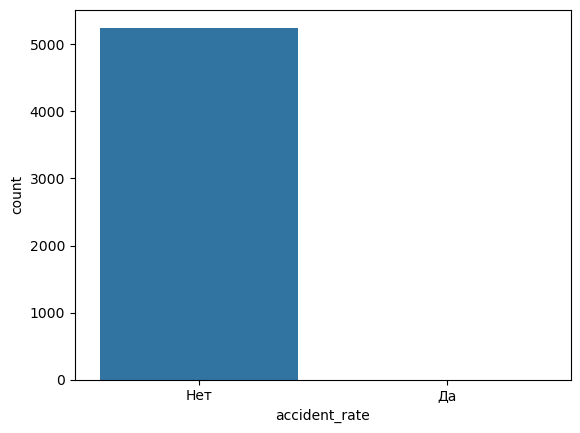

In [246]:
sns.countplot(data=df_cian, x='accident_rate')

<Axes: xlabel='finishing', ylabel='count'>

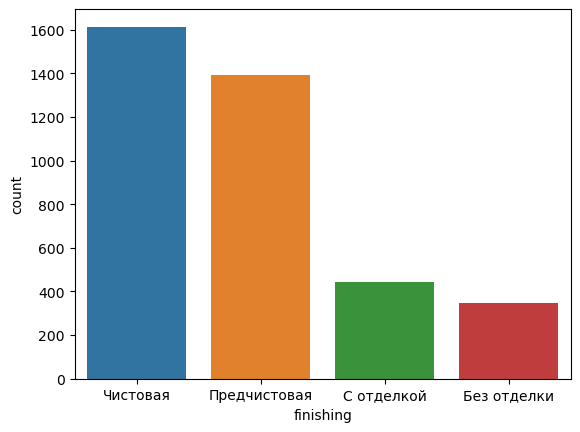

In [247]:
sns.countplot(data=df_cian, x='finishing', order = df_cian['finishing'].value_counts().index[:4])

# Анализ признаков

<Axes: xlabel='price', ylabel='Count'>

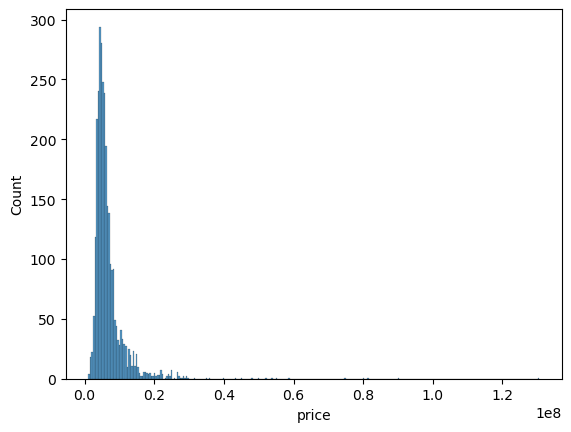

In [248]:
sns.histplot(data = df_domclick, x = 'price')

In [249]:
#df_domclick.query('price > 100000000')

<Axes: xlabel='price', ylabel='Count'>

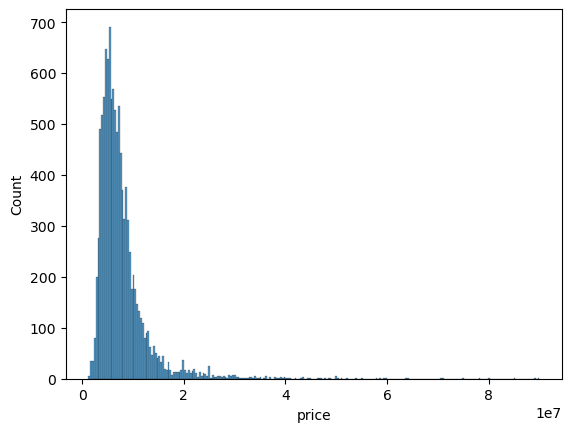

In [250]:
sns.histplot(data = df_cian, x = 'price')

<Axes: xlabel='house_floors', ylabel='Count'>

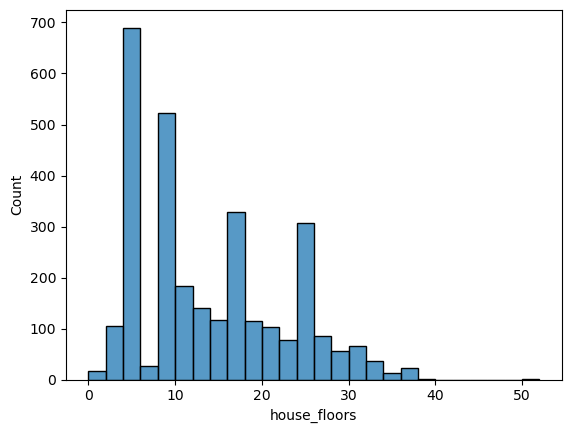

In [251]:
sns.histplot(data = df_domclick, x = 'house_floors')

<Axes: xlabel='total_floors', ylabel='Count'>

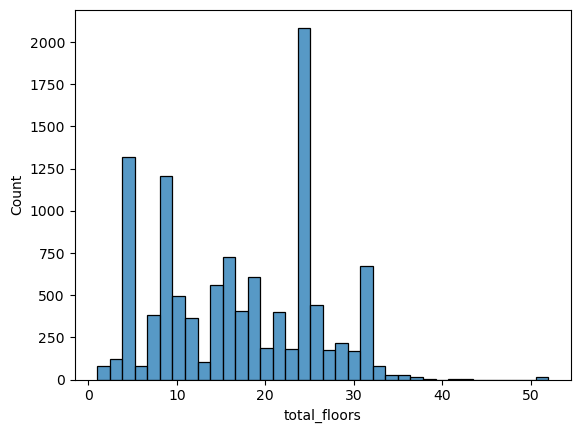

In [252]:
sns.histplot(data = df_cian, x = 'total_floors')

In [253]:
df_cian.query('total_floors > 150')

,name,price,price_for_metr,floor_object,total_floors,type_of_home,square_home,live_square,kitchen_square,height_ceiling,bathroom,balcony,repair,yer_home,garbage_chute,type_home,type_of_overlap,entrances,heating,accident_rate,gas_supply,finishing,number_of_elevators,address,link,room_count


<Axes: xlabel='objectInfo_floor', ylabel='Count'>

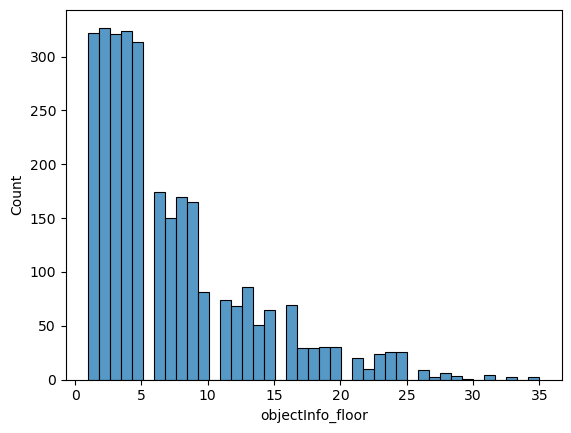

In [254]:
sns.histplot(data = df_domclick, x = 'objectInfo_floor')

<Axes: xlabel='floor_object', ylabel='Count'>

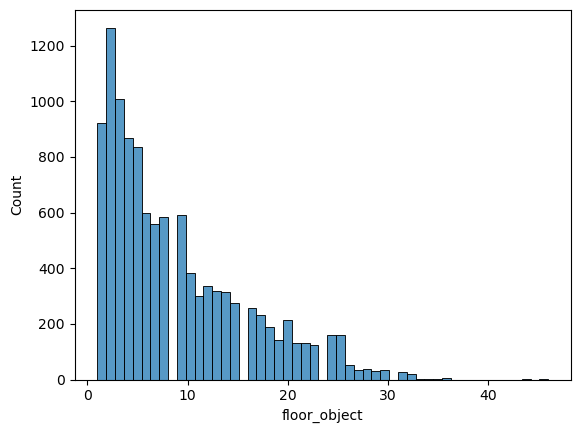

In [255]:
sns.histplot(data = df_cian, x = 'floor_object')

In [256]:
df_cian.query('floor_object < 0')

,name,price,price_for_metr,floor_object,total_floors,type_of_home,square_home,live_square,kitchen_square,height_ceiling,bathroom,balcony,repair,yer_home,garbage_chute,type_home,type_of_overlap,entrances,heating,accident_rate,gas_supply,finishing,number_of_elevators,address,link,room_count


<Axes: xlabel='objectInfo_area', ylabel='Count'>

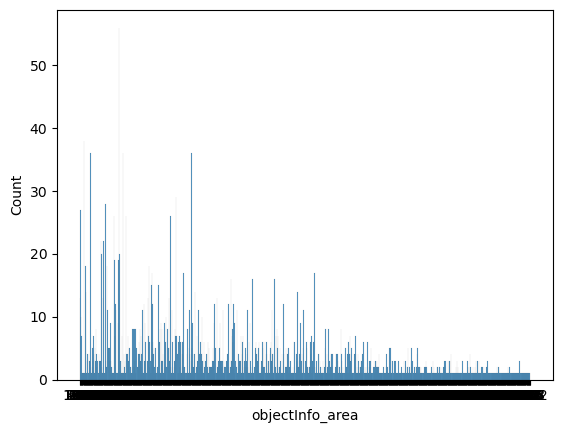

In [257]:
sns.histplot(data = df_domclick, x = 'objectInfo_area')

<Axes: xlabel='square_home', ylabel='Count'>

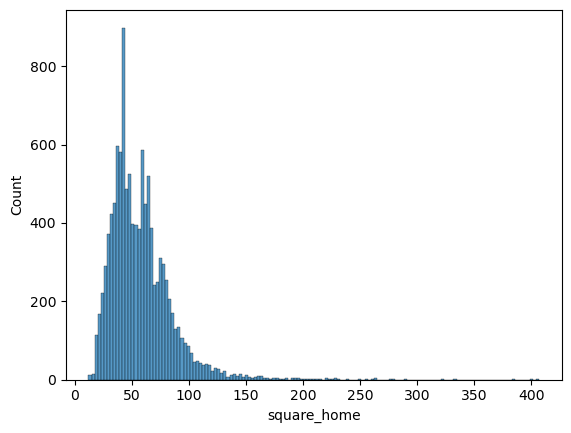

In [258]:
sns.histplot(data = df_cian, x = 'square_home')

<Axes: xlabel='objectInfo_livingArea', ylabel='Count'>

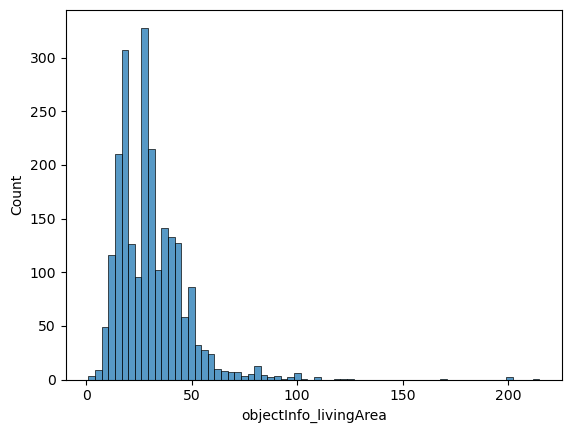

In [259]:
sns.histplot(data = df_domclick, x = 'objectInfo_livingArea')

<Axes: xlabel='live_square', ylabel='Count'>

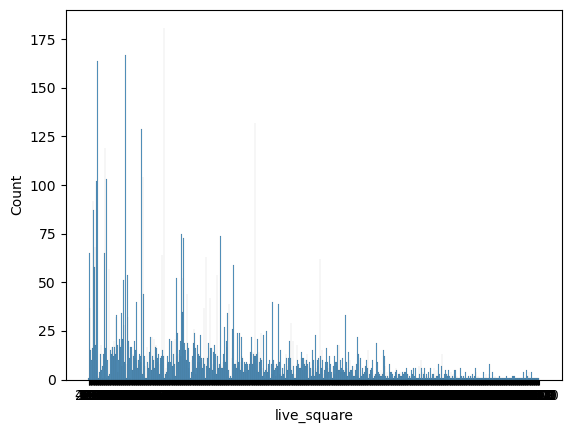

In [260]:
sns.histplot(data = df_cian, x = 'live_square')

<Axes: xlabel='objectInfo_kitchenArea', ylabel='Count'>

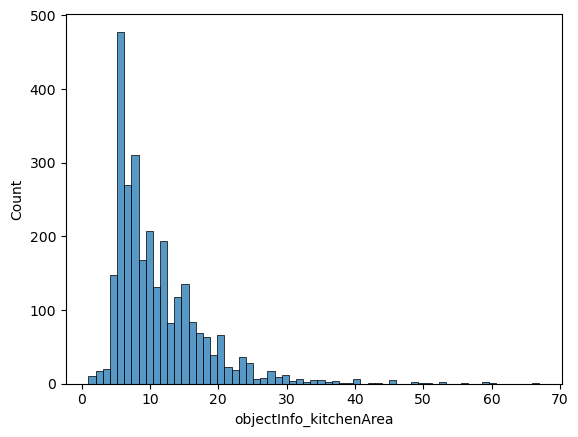

In [261]:
sns.histplot(data = df_domclick, x = 'objectInfo_kitchenArea')

<Axes: xlabel='kitchen_square', ylabel='Count'>

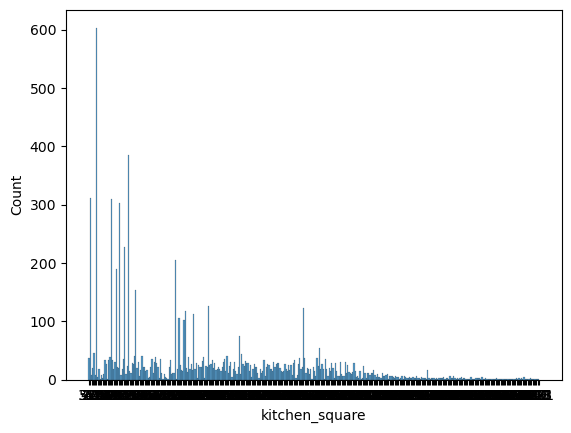

In [262]:
sns.histplot(data = df_cian, x = 'kitchen_square')

<Axes: xlabel='house_ceilingHeight', ylabel='Count'>

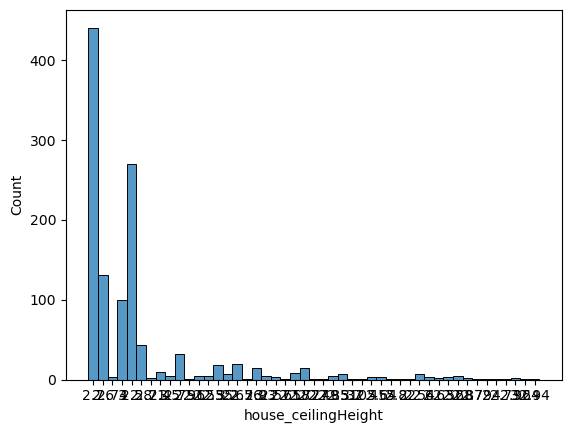

In [263]:
sns.histplot(data = df_domclick, x = 'house_ceilingHeight')

<Axes: xlabel='height_ceiling', ylabel='Count'>

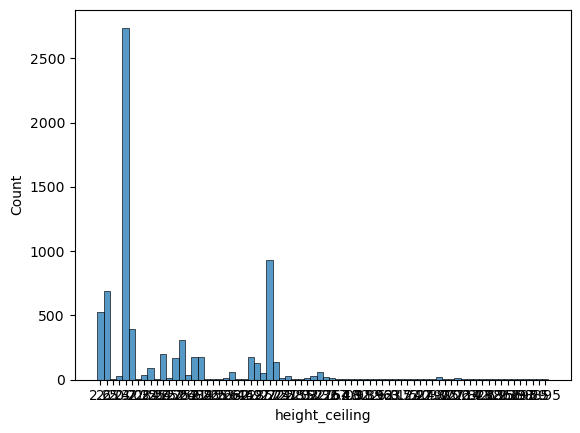

In [264]:
sns.histplot(data = df_cian, x = 'height_ceiling')

<Axes: xlabel='house_buildYear', ylabel='Count'>

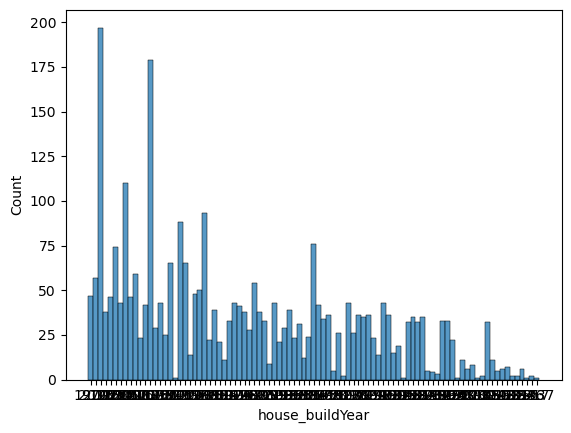

In [265]:
sns.histplot(data = df_domclick, x = 'house_buildYear')

<Axes: xlabel='yer_home', ylabel='Count'>

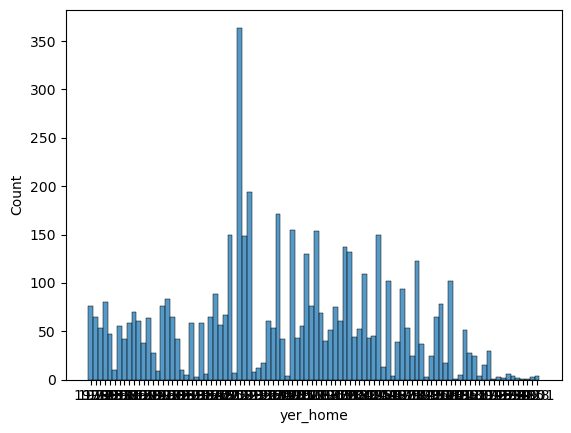

In [266]:
sns.histplot(data = df_cian, x = 'yer_home')

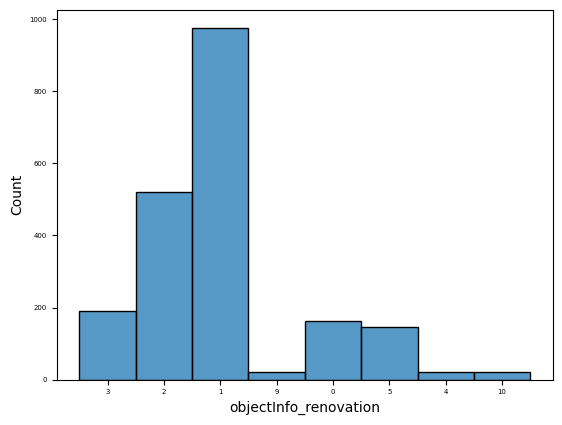

In [267]:
b = sns.histplot(data = df_domclick, x = 'objectInfo_renovation')
b.tick_params(labelsize=5)

In [268]:
df_domclick['objectInfo_renovation'].unique()

array(['3', '2', nan, '1', '9', '0', '5', '4', '10'], dtype=object)

<Axes: xlabel='repair', ylabel='Count'>

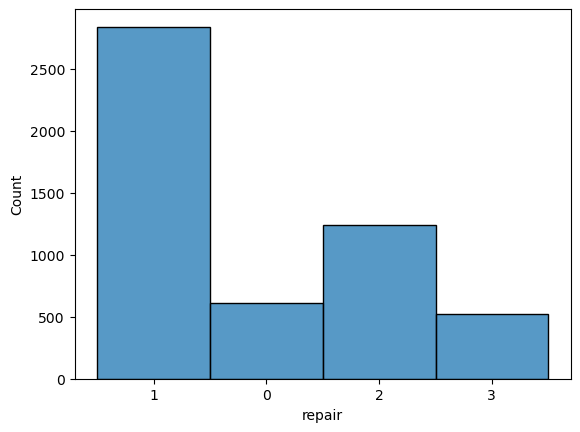

In [269]:
sns.histplot(data = df_cian, x = 'repair')

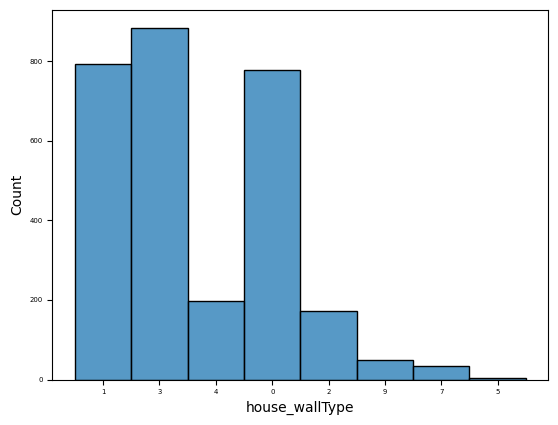

In [270]:
b = sns.histplot(data = df_domclick, x = 'house_wallType')
b.tick_params(labelsize=5)

In [271]:
df_domclick['house_wallType'].unique()

array(['1', '3', '4', '0', '2', nan, '9', '7', '5'], dtype=object)

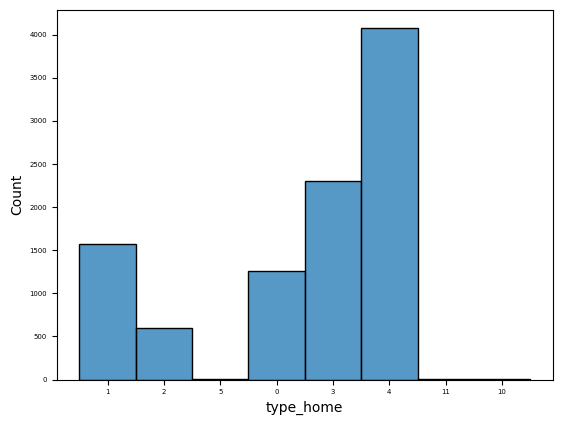

In [272]:
b = sns.histplot(data = df_cian, x = 'type_home')
b.tick_params(labelsize=5)

In [273]:
df_cian['type_home'].unique()

array(['1', nan, '2', '5', '0', '3', '4', '11', '10'], dtype=object)

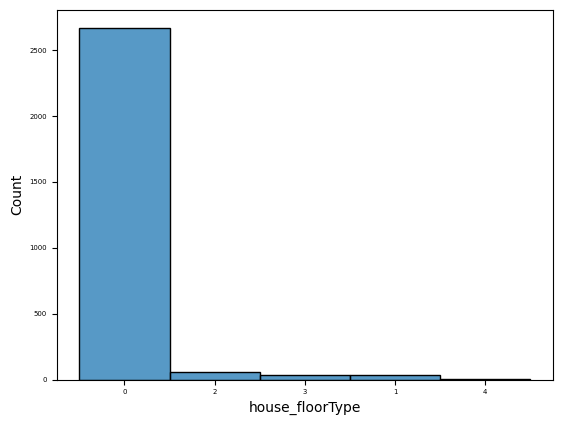

In [274]:
b = sns.histplot(data = df_domclick, x = 'house_floorType')
b.tick_params(labelsize=5)

In [275]:
df_domclick['house_floorType'].unique()

array(['0', nan, '2', '3', '1', '4'], dtype=object)

<Axes: xlabel='type_of_overlap', ylabel='Count'>

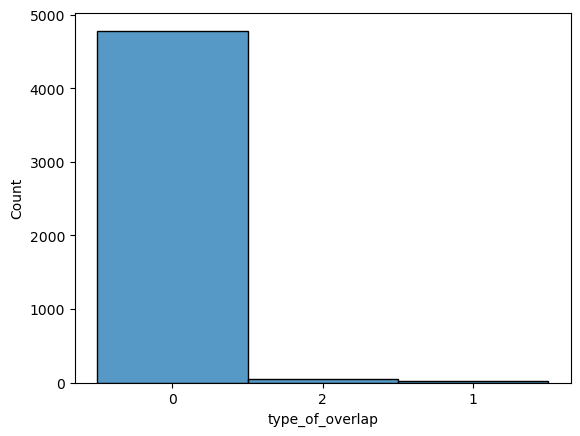

In [276]:
sns.histplot(data = df_cian, x = 'type_of_overlap')

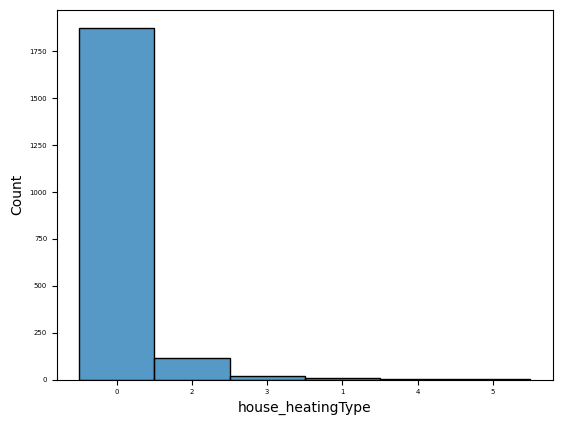

In [277]:
b = sns.histplot(data = df_domclick, x = 'house_heatingType')
b.tick_params(labelsize=5)

In [278]:
df_domclick['house_heatingType'].unique()

array(['0', nan, '2', '3', '1', '4', '5'], dtype=object)

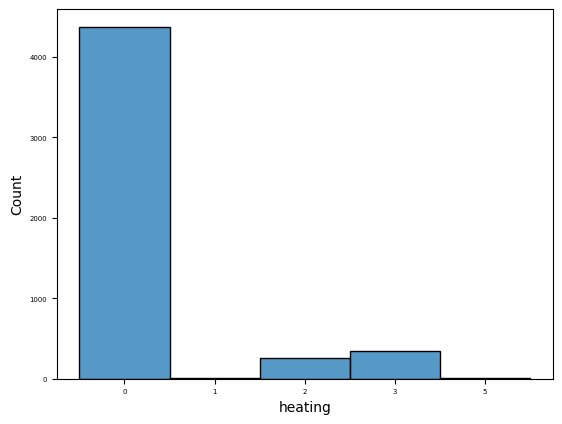

In [279]:
b = sns.histplot(data = df_cian, x = 'heating')
b.tick_params(labelsize=5)

In [280]:
df_cian['heating'].unique()

array(['0', '1', nan, '2', '3', '5'], dtype=object)

<Axes: xlabel='house_entranceCount', ylabel='count'>

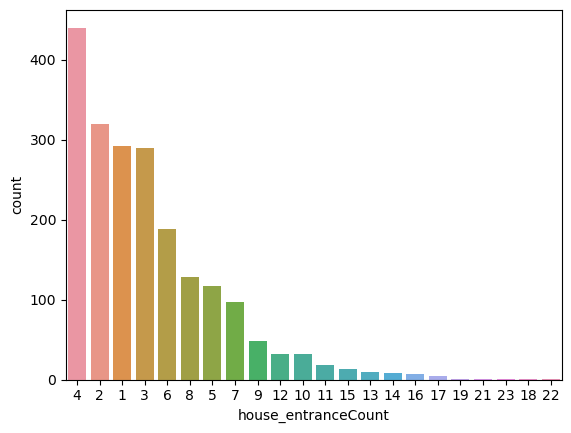

In [281]:
sns.countplot(data = df_domclick, x = 'house_entranceCount', order = df_domclick['house_entranceCount'].value_counts().index)

<Axes: xlabel='entrances', ylabel='count'>

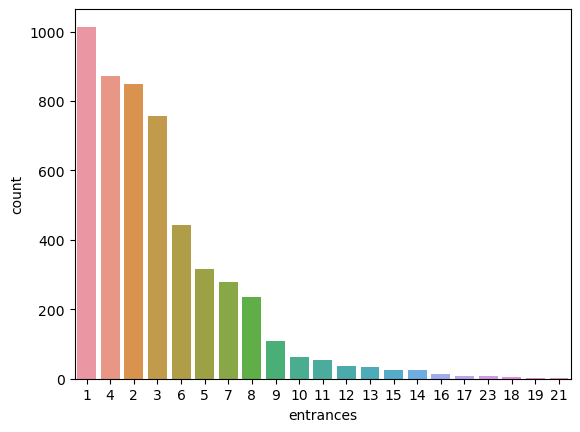

In [282]:
sns.countplot(data = df_cian, x = 'entrances', order = df_cian['entrances'].value_counts().index)

<Axes: xlabel='house_elevatorsCount', ylabel='count'>

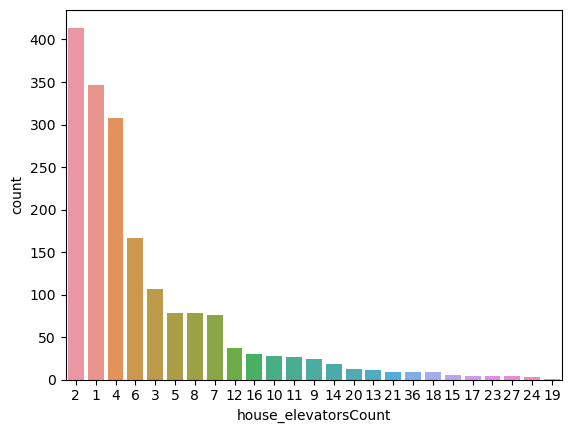

In [283]:
sns.countplot(data = df_domclick, x = 'house_elevatorsCount', order = df_domclick['house_elevatorsCount'].value_counts().index)

<Axes: xlabel='number_of_elevators', ylabel='count'>

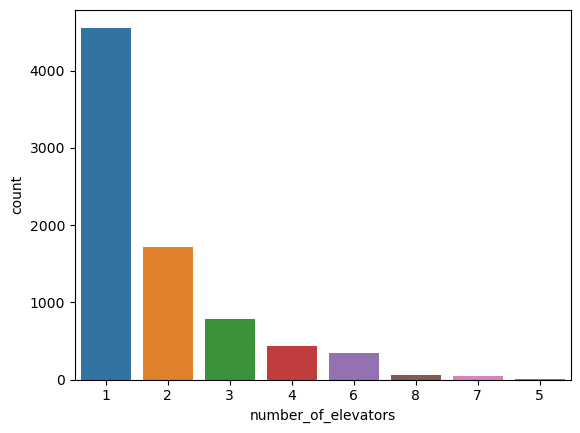

In [284]:
sns.countplot(data = df_cian, x = 'number_of_elevators', order = df_cian['number_of_elevators'].value_counts().index)

# Кодирование данных

In [285]:
df_domclick_prepared = df_domclick.drop(columns = ['id', 'region', 'address', 'house_areaCommonPropery', 'house_areaResidential', 'objectInfo_loggias', 'saleType'])

cat_cols = ['house_hasGarbageDisposer', 'house_coldWaterType', 'house_electricalType', 'house_energyEfficiency',
           'house_fireFightingType', 'house_foundationType', 'house_sewerageType', 'house_ventilationType', 'objectInfo_hasGas']



df_domclick_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3014 entries, 0 to 3013
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       3014 non-null   float64
 1   longitude                      3014 non-null   float64
 2   price                          3014 non-null   int64  
 3   house_floors                   3014 non-null   int64  
 4   house_buildYear                3000 non-null   object 
 5   house_ceilingHeight            1191 non-null   object 
 6   house_hasGarbageDisposer       1705 non-null   object 
 7   house_liftsFreight             1611 non-null   float64
 8   house_liftsPassenger           1919 non-null   float64
 9   house_wallType                 2912 non-null   object 
 10  house_areaNonResidential       2001 non-null   object 
 11  house_basementArea             1948 non-null   object 
 12  house_chuteCount               438 non-null    o

In [286]:
mappc_d = {}
ord_enc = OrdinalEncoder()

df_domclick_prepared[cat_cols] = ord_enc.fit_transform(df_domclick_prepared[cat_cols])
df_domclick_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3014 entries, 0 to 3013
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       3014 non-null   float64
 1   longitude                      3014 non-null   float64
 2   price                          3014 non-null   int64  
 3   house_floors                   3014 non-null   int64  
 4   house_buildYear                3000 non-null   object 
 5   house_ceilingHeight            1191 non-null   object 
 6   house_hasGarbageDisposer       1705 non-null   float64
 7   house_liftsFreight             1611 non-null   float64
 8   house_liftsPassenger           1919 non-null   float64
 9   house_wallType                 2912 non-null   object 
 10  house_areaNonResidential       2001 non-null   object 
 11  house_basementArea             1948 non-null   object 
 12  house_chuteCount               438 non-null    o

In [287]:
non_num_cols = ['price', 'house_buildYear', 'house_ceilingHeight', 'house_areaNonResidential', 'house_basementArea', 'house_chuteCount',
               'house_electricalEntriesCount', 'house_elevatorsCount', 'house_entranceCount', 'house_parkingSquare', 'house_sewerageCesspoolsVolume',
               'objectInfo_area', 'objectInfo_connectedBathrooms', 'objectInfo_separatedBathrooms', 'house_wallType', 'house_floorType',
                'house_heatingType', 'objectInfo_renovation']

for col in non_num_cols:
    df_domclick_prepared[col] = pd.to_numeric(df_domclick_prepared[col].astype(str).str.strip(), errors = 'coerce')

In [288]:
df_domclick_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3014 entries, 0 to 3013
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       3014 non-null   float64
 1   longitude                      3014 non-null   float64
 2   price                          3014 non-null   int64  
 3   house_floors                   3014 non-null   int64  
 4   house_buildYear                3000 non-null   float64
 5   house_ceilingHeight            1191 non-null   float64
 6   house_hasGarbageDisposer       1705 non-null   float64
 7   house_liftsFreight             1611 non-null   float64
 8   house_liftsPassenger           1919 non-null   float64
 9   house_wallType                 2912 non-null   float64
 10  house_areaNonResidential       2001 non-null   float64
 11  house_basementArea             1948 non-null   float64
 12  house_chuteCount               438 non-null    f

In [289]:
df_cian_prepared = df_cian.drop(columns = ['name', 'link', 'address', 'accident_rate'])
                                
cat_cols_cian = ['type_of_home', 'finishing', 'gas_supply']

df_cian_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11166 entries, 0 to 26679
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                11166 non-null  int64  
 1   price_for_metr       11166 non-null  int64  
 2   floor_object         11166 non-null  int64  
 3   total_floors         11166 non-null  int64  
 4   type_of_home         11166 non-null  object 
 5   square_home          11166 non-null  float64
 6   live_square          7245 non-null   object 
 7   kitchen_square       7893 non-null   object 
 8   height_ceiling       7358 non-null   object 
 9   bathroom             6601 non-null   object 
 10  balcony              6183 non-null   object 
 11  repair               5208 non-null   object 
 12  yer_home             5251 non-null   object 
 13  garbage_chute        1102 non-null   object 
 14  type_home            9828 non-null   object 
 15  type_of_overlap      4849 non-null   obje

In [290]:
mappc_d = {}
ord_enc = OrdinalEncoder()

df_cian_prepared[cat_cols_cian] = ord_enc.fit_transform(df_cian_prepared[cat_cols_cian])
df_cian_prepared = df_cian_prepared.replace('Да', 1)
df_cian_prepared = df_cian_prepared.replace('Нет', 0)
df_cian_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11166 entries, 0 to 26679
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                11166 non-null  int64  
 1   price_for_metr       11166 non-null  int64  
 2   floor_object         11166 non-null  int64  
 3   total_floors         11166 non-null  int64  
 4   type_of_home         11166 non-null  float64
 5   square_home          11166 non-null  float64
 6   live_square          7245 non-null   object 
 7   kitchen_square       7893 non-null   object 
 8   height_ceiling       7358 non-null   object 
 9   bathroom             6601 non-null   object 
 10  balcony              6183 non-null   object 
 11  repair               5208 non-null   object 
 12  yer_home             5251 non-null   object 
 13  garbage_chute        1102 non-null   float64
 14  type_home            9828 non-null   object 
 15  type_of_overlap      4849 non-null   obje

In [291]:
non_num_cols_cian = ['live_square', 'kitchen_square', 'height_ceiling', 'bathroom', 'balcony', 'yer_home',
                     'entrances', 'number_of_elevators', 'room_count', 'repair', 'type_home', 'type_of_overlap', 'heating']

for col in non_num_cols_cian:
    df_cian_prepared[col] = pd.to_numeric(df_cian_prepared[col].astype(str).str.strip(), errors = 'coerce')

In [292]:
df_cian_prepared.info()
df_cian_prepared.head()

<class 'pandas.core.frame.DataFrame'>
Index: 11166 entries, 0 to 26679
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                11166 non-null  int64  
 1   price_for_metr       11166 non-null  int64  
 2   floor_object         11166 non-null  int64  
 3   total_floors         11166 non-null  int64  
 4   type_of_home         11166 non-null  float64
 5   square_home          11166 non-null  float64
 6   live_square          7245 non-null   float64
 7   kitchen_square       7893 non-null   float64
 8   height_ceiling       7358 non-null   float64
 9   bathroom             6601 non-null   float64
 10  balcony              6183 non-null   float64
 11  repair               5208 non-null   float64
 12  yer_home             5251 non-null   float64
 13  garbage_chute        1102 non-null   float64
 14  type_home            9828 non-null   float64
 15  type_of_overlap      4849 non-null   floa

,price,price_for_metr,floor_object,total_floors,type_of_home,square_home,live_square,kitchen_square,height_ceiling,bathroom,balcony,repair,yer_home,garbage_chute,type_home,type_of_overlap,entrances,heating,gas_supply,finishing,number_of_elevators,room_count
0,1290000,103200,1,5,0.00000,12.50000,NaN,3.00000,NaN,1.00000,NaN,1.00000,1970.00000,NaN,1.00000,0.00000,3.00000,0.00000,0.00000,NaN,NaN,1
2,1300000,33679,2,2,0.00000,38.60000,NaN,5.00000,NaN,NaN,NaN,1.00000,1974.00000,NaN,NaN,2.00000,1.00000,1.00000,1.00000,NaN,NaN,2
3,1300000,89041,1,5,0.00000,14.60000,5.40000,4.20000,NaN,1.00000,NaN,1.00000,1970.00000,0.00000,1.00000,0.00000,3.00000,0.00000,0.00000,NaN,NaN,0
4,1200000,15385,11,12,0.00000,78.00000,45.00000,NaN,2.60000,1.00000,1.00000,0.00000,1989.00000,NaN,1.00000,0.00000,8.00000,0.00000,1.00000,NaN,2.00000,3
5,1300000,56522,2,3,0.00000,23.00000,NaN,NaN,NaN,1.00000,NaN,1.00000,NaN,NaN,2.00000,NaN,NaN,NaN,0.00000,NaN,NaN,0


In [293]:
df_domclick_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3014 entries, 0 to 3013
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       3014 non-null   float64
 1   longitude                      3014 non-null   float64
 2   price                          3014 non-null   int64  
 3   house_floors                   3014 non-null   int64  
 4   house_buildYear                3000 non-null   float64
 5   house_ceilingHeight            1191 non-null   float64
 6   house_hasGarbageDisposer       1705 non-null   float64
 7   house_liftsFreight             1611 non-null   float64
 8   house_liftsPassenger           1919 non-null   float64
 9   house_wallType                 2912 non-null   float64
 10  house_areaNonResidential       2001 non-null   float64
 11  house_basementArea             1948 non-null   float64
 12  house_chuteCount               438 non-null    f

# Соединение датасетов

In [294]:
common_features = ['price', 'room_count', 'floor', 'totalFloors', 'area', 'kitchenArea', 'livingArea', 'ceilingHeight', 'bathroomCount', 
                   'balconyCount', 'repairType', 'buildYear', 'hasGarbageChute', 'wallType', 'floorType', 'entranceCount',
                   'heatingType', 'hasGas', 'elevatorCount']

domclick_cf = ['price', 'objectInfo_rooms', 'objectInfo_floor', 'house_floors', 'objectInfo_area', 'objectInfo_kitchenArea', 'objectInfo_livingArea', 
               'house_ceilingHeight', 'objectInfo_separatedBathrooms', 'objectInfo_balconies', 'objectInfo_renovation', 'house_buildYear',
               'house_hasGarbageDisposer', 'house_wallType', 'house_floorType', 'house_entranceCount', 'house_heatingType', 
               'objectInfo_hasGas', 'house_elevatorsCount']

cian_cf = ['price', 'room_count', 'floor_object', 'total_floors', 'square_home', 'kitchen_square', 'live_square', 'height_ceiling', 'bathroom',
           'balcony', 'repair', 'yer_home',  'type_home', 'type_of_overlap', 'entrances', 'heating', 'gas_supply',
           'number_of_elevators']

In [295]:
cat_cols_cian = ['repair', 'garbage_chute', 'type_home', 'type_of_overlap', 'heating', 'gas_supply']

cat_cols_domclick = ['objectInfo_renovation', 'house_hasGarbageDisposer', 'house_wallType', 'house_floorType',
                     'house_heatingType', 'objectInfo_hasGas']

In [296]:
df_domclick['objectInfo_separatedBathrooms'].unique()

array([nan, '2', '1', '0'], dtype=object)

In [297]:
for col_cian, col_domclick in zip(cat_cols_cian, cat_cols_domclick):
    df_cian[col_cian].unique()
    df_domclick[col_domclick].unique()

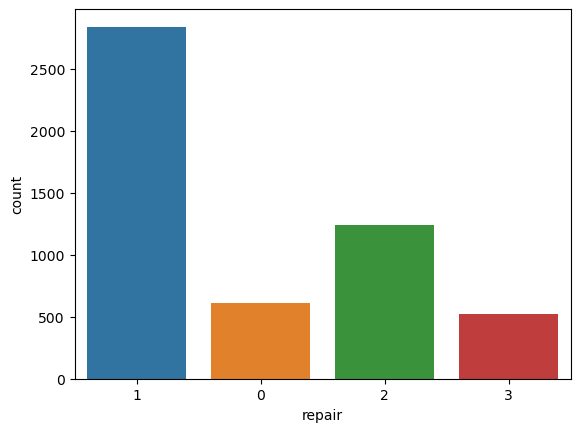

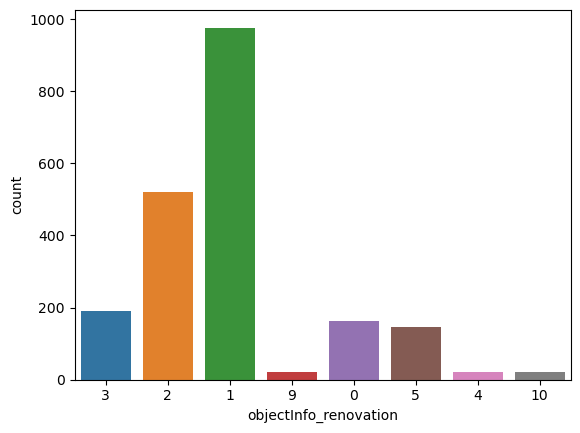

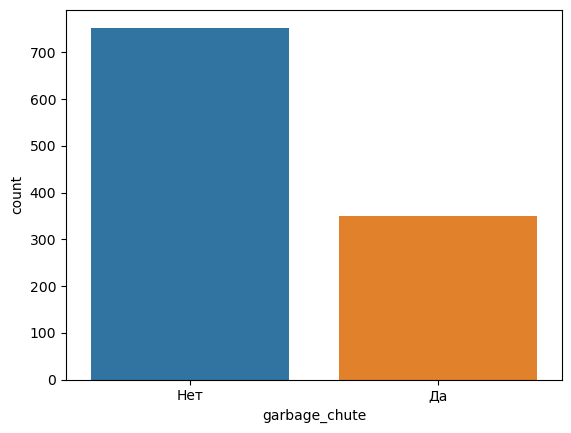

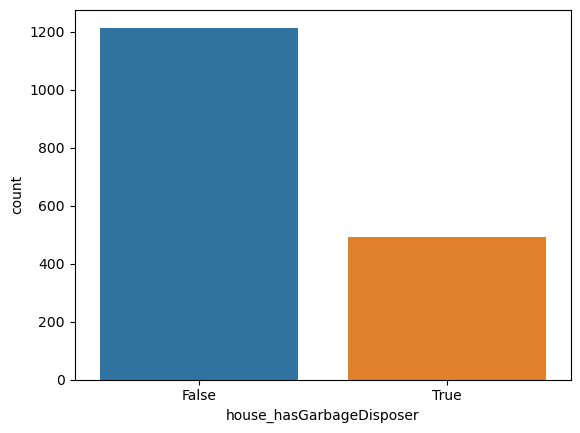

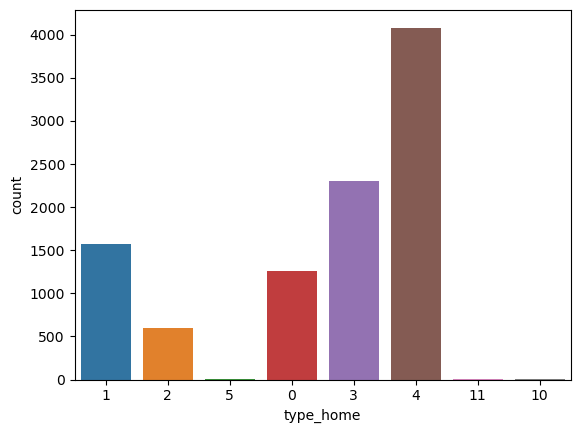

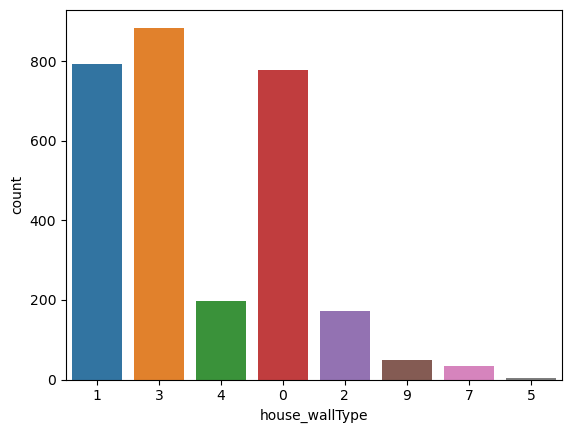

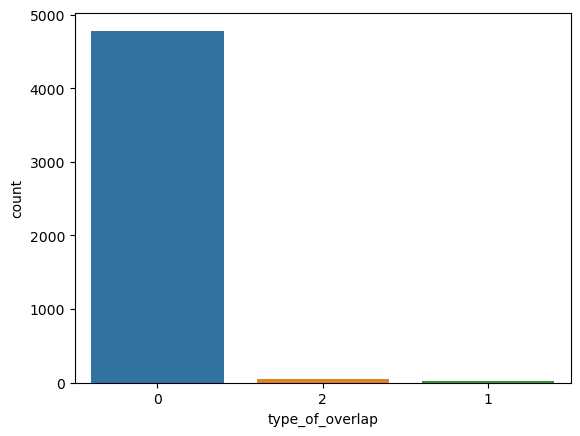

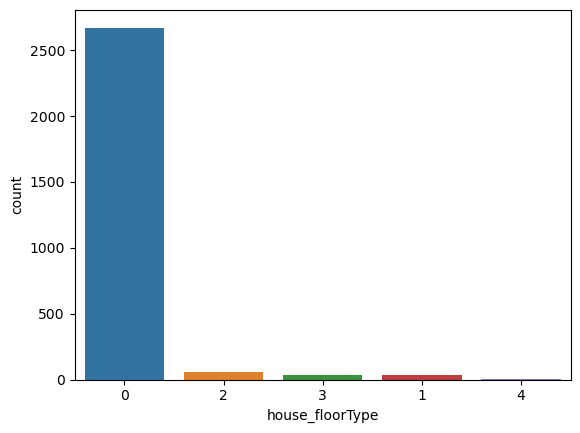

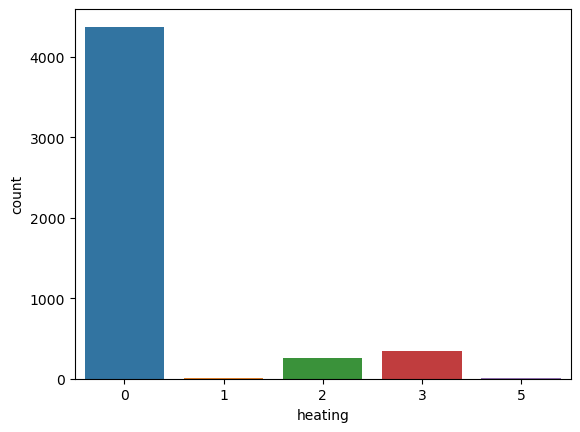

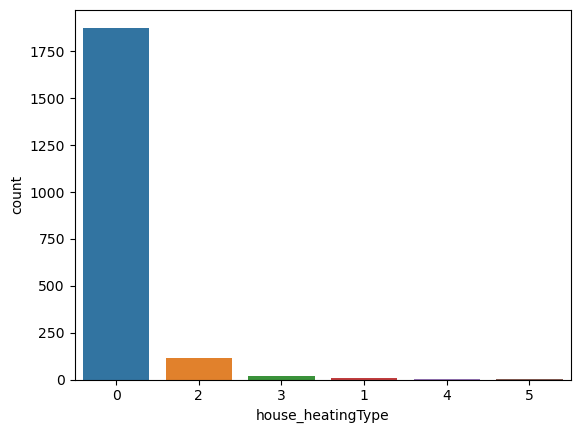

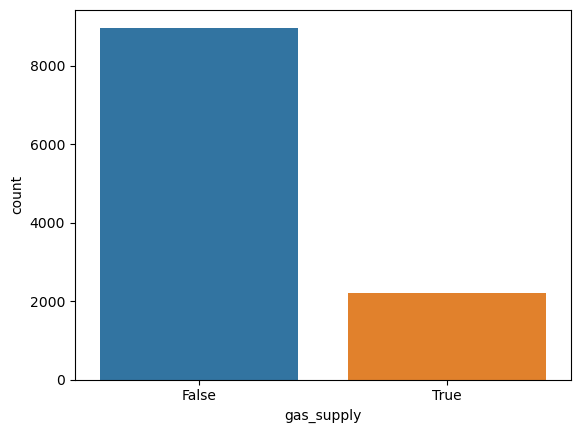

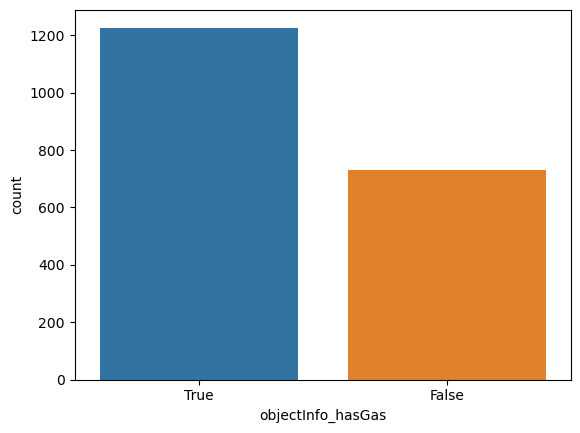

<Figure size 640x480 with 0 Axes>

In [298]:
for col_cian, col_domclick in zip(cat_cols_cian, cat_cols_domclick):
    sns.countplot(data = df_cian, x = col_cian)
    plt.figure()
    sns.countplot(data = df_domclick, x = col_domclick)
    plt.figure()

In [299]:
cat_cols_cian = ['repair', 'garbage_chute', 'type_home', 'type_of_overlap', 'heating', 'gas_supply']

cat_cols_domclick = ['objectInfo_renovation', 'house_hasGarbageDisposer', 'house_wallType', 'house_floorType',
                     'house_heatingType', 'objectInfo_hasGas']

In [300]:
common_features = ['price', 'room_count', 'floor', 'totalFloors', 'area', 'kitchenArea', 'livingArea', 'ceilingHeight', 'bathroomCount', 
                   'balconyCount', 'repairType', 'buildYear', 'hasGarbageChute', 'wallType', 'floorType', 'entranceCount',
                   'heatingType', 'hasGas', 'elevatorCount']

domclick_cf = ['price', 'objectInfo_rooms', 'objectInfo_floor', 'house_floors', 'objectInfo_area', 'objectInfo_kitchenArea', 'objectInfo_livingArea', 
               'house_ceilingHeight', 'objectInfo_separatedBathrooms', 'objectInfo_balconies', 'objectInfo_renovation', 'house_buildYear',
               'house_hasGarbageDisposer', 'house_wallType', 'house_floorType', 'house_entranceCount', 'house_heatingType', 
               'objectInfo_hasGas', 'house_elevatorsCount']

cian_cf = ['price', 'room_count', 'floor_object', 'total_floors', 'square_home', 'kitchen_square', 'live_square', 'height_ceiling', 'bathroom',
           'balcony', 'repair', 'yer_home', 'garbage_chute',  'type_home', 'type_of_overlap', 'entrances', 'heating', 'gas_supply',
           'number_of_elevators']

In [301]:
merge_domclick = df_domclick_prepared[domclick_cf]
merge_domclick.columns = common_features
merge_domclick.info()
merge_domclick.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3014 entries, 0 to 3013
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            3014 non-null   int64  
 1   room_count       3014 non-null   int64  
 2   floor            3014 non-null   int64  
 3   totalFloors      3014 non-null   int64  
 4   area             3013 non-null   float64
 5   kitchenArea      2819 non-null   float64
 6   livingArea       2271 non-null   float64
 7   ceilingHeight    1191 non-null   float64
 8   bathroomCount    1429 non-null   float64
 9   balconyCount     3014 non-null   int64  
 10  repairType       2063 non-null   float64
 11  buildYear        3000 non-null   float64
 12  hasGarbageChute  1705 non-null   float64
 13  wallType         2912 non-null   float64
 14  floorType        2801 non-null   float64
 15  entranceCount    2047 non-null   float64
 16  heatingType      2020 non-null   float64
 17  hasGas        

,price,room_count,floor,totalFloors,area,kitchenArea,livingArea,ceilingHeight,bathroomCount,balconyCount,repairType,buildYear,hasGarbageChute,wallType,floorType,entranceCount,heatingType,hasGas,elevatorCount
0,6800000,3,2,5,55.00000,7.00000,NaN,NaN,NaN,1,3.00000,1970.00000,0.00000,1.00000,0.00000,8.00000,0.00000,1.00000,NaN
1,4990000,0,15,16,58.00000,NaN,NaN,NaN,NaN,0,2.00000,2018.00000,NaN,3.00000,0.00000,NaN,NaN,NaN,1.00000
2,11800000,2,5,36,73.00000,12.00000,54.00000,NaN,2.00000,1,NaN,2022.00000,NaN,4.00000,0.00000,NaN,NaN,NaN,NaN
3,5600000,3,4,9,58.00000,6.00000,40.00000,NaN,1.00000,0,1.00000,1969.00000,1.00000,0.00000,0.00000,4.00000,0.00000,1.00000,4.00000
4,3600000,2,3,4,42.60000,5.40000,28.50000,NaN,NaN,1,2.00000,1962.00000,NaN,1.00000,0.00000,2.00000,0.00000,1.00000,NaN


In [302]:
merge_domclick['repairType'].unique()

array([ 3.,  2., nan,  1.,  9.,  0.,  5.,  4., 10.])

In [303]:
merge_cian = df_cian_prepared[cian_cf]
merge_cian.columns = common_features
merge_cian.reset_index(drop = True, inplace=True)
merge_cian.info()
merge_cian.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11166 entries, 0 to 11165
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            11166 non-null  int64  
 1   room_count       11166 non-null  int64  
 2   floor            11166 non-null  int64  
 3   totalFloors      11166 non-null  int64  
 4   area             11166 non-null  float64
 5   kitchenArea      7893 non-null   float64
 6   livingArea       7245 non-null   float64
 7   ceilingHeight    7358 non-null   float64
 8   bathroomCount    6601 non-null   float64
 9   balconyCount     6183 non-null   float64
 10  repairType       5208 non-null   float64
 11  buildYear        5251 non-null   float64
 12  hasGarbageChute  1102 non-null   float64
 13  wallType         9828 non-null   float64
 14  floorType        4849 non-null   float64
 15  entranceCount    5150 non-null   float64
 16  heatingType      4992 non-null   float64
 17  hasGas      

,price,room_count,floor,totalFloors,area,kitchenArea,livingArea,ceilingHeight,bathroomCount,balconyCount,repairType,buildYear,hasGarbageChute,wallType,floorType,entranceCount,heatingType,hasGas,elevatorCount
0,1290000,1,1,5,12.50000,3.00000,NaN,NaN,1.00000,NaN,1.00000,1970.00000,NaN,1.00000,0.00000,3.00000,0.00000,0.00000,NaN
1,1300000,2,2,2,38.60000,5.00000,NaN,NaN,NaN,NaN,1.00000,1974.00000,NaN,NaN,2.00000,1.00000,1.00000,1.00000,NaN
2,1300000,0,1,5,14.60000,4.20000,5.40000,NaN,1.00000,NaN,1.00000,1970.00000,0.00000,1.00000,0.00000,3.00000,0.00000,0.00000,NaN
3,1200000,3,11,12,78.00000,NaN,45.00000,2.60000,1.00000,1.00000,0.00000,1989.00000,NaN,1.00000,0.00000,8.00000,0.00000,1.00000,2.00000
4,1300000,0,2,3,23.00000,NaN,NaN,NaN,1.00000,NaN,1.00000,NaN,NaN,2.00000,NaN,NaN,NaN,0.00000,NaN


In [304]:
df_combined = pd.concat([merge_domclick, merge_cian])

In [305]:
df_combined = df_combined.drop_duplicates()

In [306]:
df_combined.reset_index(drop = True, inplace=True)

In [307]:
df_combined.info()
df_combined.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14146 entries, 0 to 14145
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            14146 non-null  int64  
 1   room_count       14146 non-null  int64  
 2   floor            14146 non-null  int64  
 3   totalFloors      14146 non-null  int64  
 4   area             14145 non-null  float64
 5   kitchenArea      10693 non-null  float64
 6   livingArea       9498 non-null   float64
 7   ceilingHeight    8522 non-null   float64
 8   bathroomCount    8012 non-null   float64
 9   balconyCount     9181 non-null   float64
 10  repairType       7260 non-null   float64
 11  buildYear        8240 non-null   float64
 12  hasGarbageChute  2802 non-null   float64
 13  wallType         12706 non-null  float64
 14  floorType        7639 non-null   float64
 15  entranceCount    7187 non-null   float64
 16  heatingType      7002 non-null   float64
 17  hasGas      

,price,room_count,floor,totalFloors,area,kitchenArea,livingArea,ceilingHeight,bathroomCount,balconyCount,repairType,buildYear,hasGarbageChute,wallType,floorType,entranceCount,heatingType,hasGas,elevatorCount
0,6800000,3,2,5,55.00000,7.00000,NaN,NaN,NaN,1.00000,3.00000,1970.00000,0.00000,1.00000,0.00000,8.00000,0.00000,1.00000,NaN
1,4990000,0,15,16,58.00000,NaN,NaN,NaN,NaN,0.00000,2.00000,2018.00000,NaN,3.00000,0.00000,NaN,NaN,NaN,1.00000
2,11800000,2,5,36,73.00000,12.00000,54.00000,NaN,2.00000,1.00000,NaN,2022.00000,NaN,4.00000,0.00000,NaN,NaN,NaN,NaN
3,5600000,3,4,9,58.00000,6.00000,40.00000,NaN,1.00000,0.00000,1.00000,1969.00000,1.00000,0.00000,0.00000,4.00000,0.00000,1.00000,4.00000
4,3600000,2,3,4,42.60000,5.40000,28.50000,NaN,NaN,1.00000,2.00000,1962.00000,NaN,1.00000,0.00000,2.00000,0.00000,1.00000,NaN


<Axes: xlabel='price', ylabel='Count'>

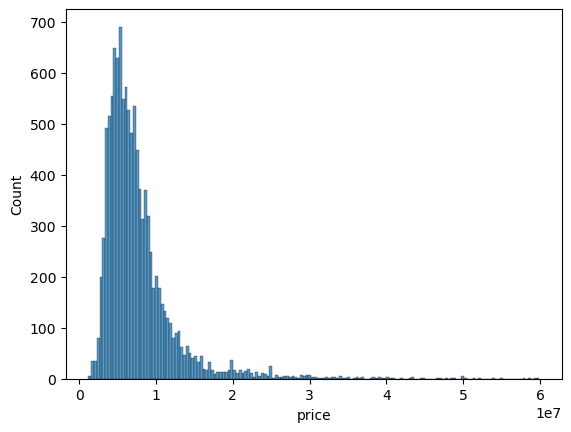

In [308]:
sns.histplot(data = df_cian_prepared.query('price < 60000000'), x = 'price')

<Axes: xlabel='price', ylabel='Count'>

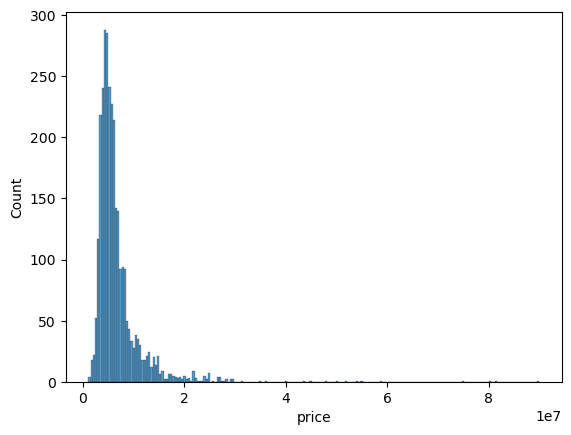

In [309]:
sns.histplot(data = df_domclick_prepared.query('price < 100000000'), x = 'price')

<Axes: xlabel='price', ylabel='Count'>

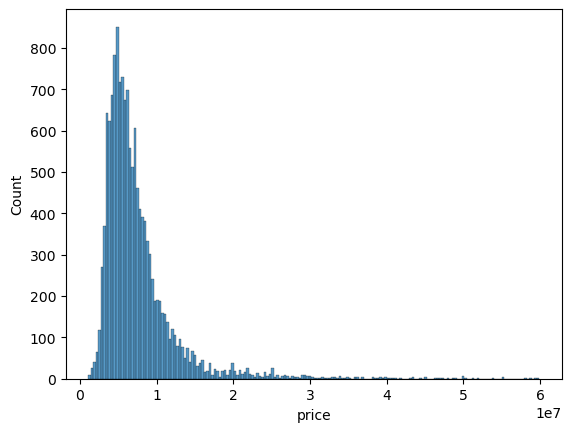

In [310]:
sns.histplot(data = df_combined.query('price < 60000000'), x = 'price')

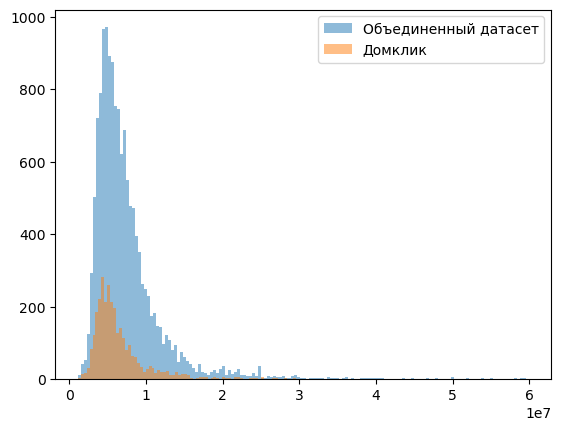

In [311]:
plt.hist(df_combined.query('price < 60000000')['price'], 150, alpha=0.5, label='Объединенный датасет')
plt.hist(df_domclick_prepared.query('price < 60000000')['price'], 150, alpha=0.5, label='Домклик')
plt.legend(loc='upper right')
plt.show()

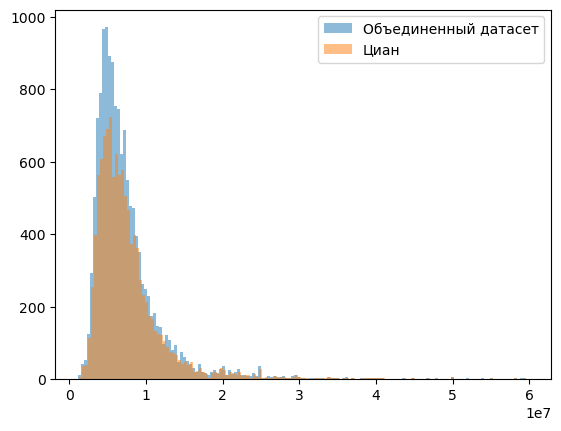

In [312]:
plt.hist(df_combined.query('price < 60000000')['price'], 150, alpha=0.5, label='Объединенный датасет')
plt.hist(df_cian_prepared.query('price < 60000000')['price'], 150, alpha=0.5, label='Циан')
plt.legend(loc='upper right')
plt.show()

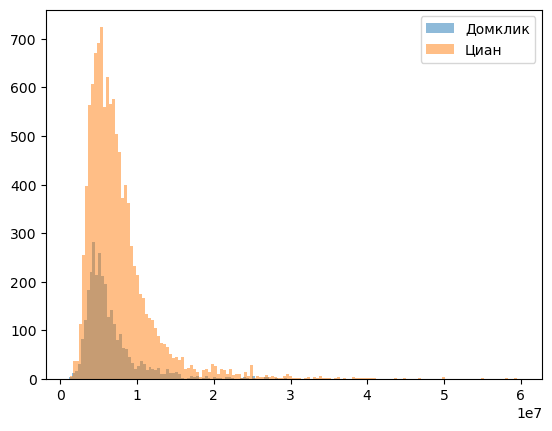

In [313]:
plt.hist(df_domclick_prepared.query('price < 60000000')['price'], 150, alpha=0.5, label='Домклик')
plt.hist(df_cian_prepared.query('price < 60000000')['price'], 150, alpha=0.5, label='Циан')
plt.legend(loc='upper right')
plt.show()

In [314]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [315]:
df_domclick_prepared['price'].describe()

count        3014.00000
mean      6833636.03351
std       5781038.56403
min       1100000.00000
25%       4300000.00000
50%       5500000.00000
75%       7463500.00000
max     130585000.00000
Name: price, dtype: float64

In [316]:
df_cian_prepared['price'].describe()

count      11166.00000
mean     7774813.27306
std      5532575.67000
min      1200000.00000
25%      4800000.00000
50%      6476960.00000
75%      8865000.00000
max     90000000.00000
Name: price, dtype: float64

In [317]:
df_combined['price'].describe()

count       14146.00000
mean      7576995.71547
std       5604718.99550
min       1100000.00000
25%       4647551.50000
50%       6200000.00000
75%       8600000.00000
max     130585000.00000
Name: price, dtype: float64

In [318]:
cat_cols_cian = ['repair', 'garbage_chute', 'type_home', 'type_of_overlap', 'heating', 'gas_supply']

cat_cols_domclick = ['objectInfo_renovation', 'house_hasGarbageDisposer', 'house_wallType', 'house_floorType',
                     'house_heatingType', 'objectInfo_hasGas']

cat_cols_cf = ['repairType', 'hasGarbageChute', 'wallType', 'floorType', 'heatingType', 'hasGas']

In [319]:
num_cols_cian = ['price', 'floor_object', 'total_floors', 'square_home', 'kitchen_square', 'live_square', 'height_ceiling',
                 'bathroom', 'balcony', 'buildYear', 'entranceCount', 'elevatorCount']

num_cols_domclick = ['price', 'objectInfo_floor', 'house_floors', 'objectInfo_area', 'objectInfo_kitchenArea', 
                     'objectInfo_livingArea', 'house_ceilingHeight', 'objectInfo_separatedBathrooms', 'objectInfo_balconies',
                     'house_buildYear', 'house_entranceCount', 'house_elevatorsCount']

num_cols_cf = ['price', 'floor', 'totalFloors', 'area', 'kitchenArea', 'livingArea', 'ceilingHeight', 'bathroomCount', 
                   'balconyCount', 'buildYear', 'entranceCount', 'elevatorCount']

C:\Users\shadee\AppData\Local\Temp\ipykernel_15700\3097855927.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


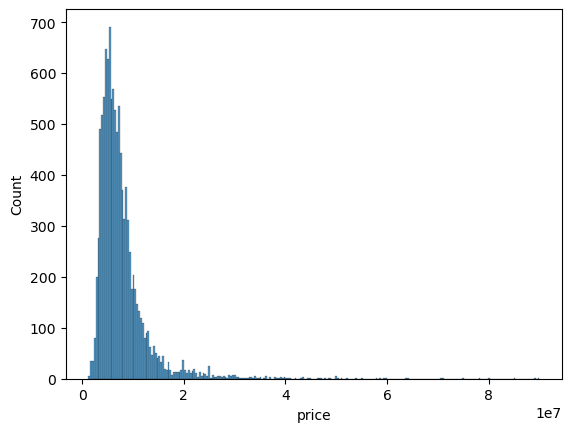

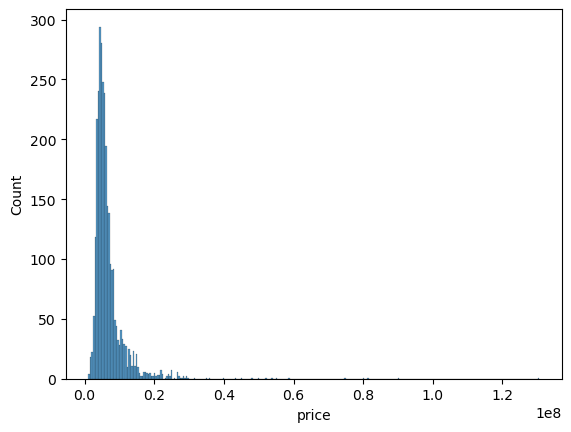

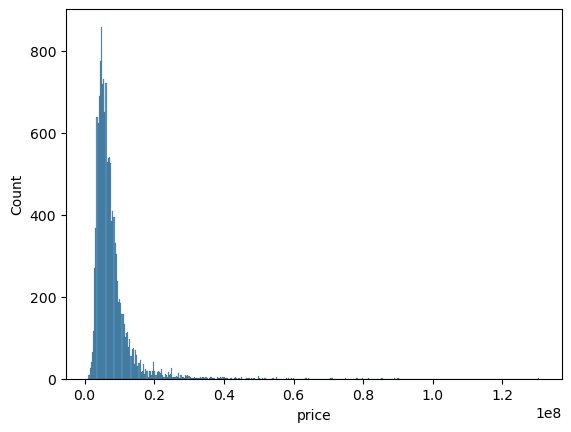

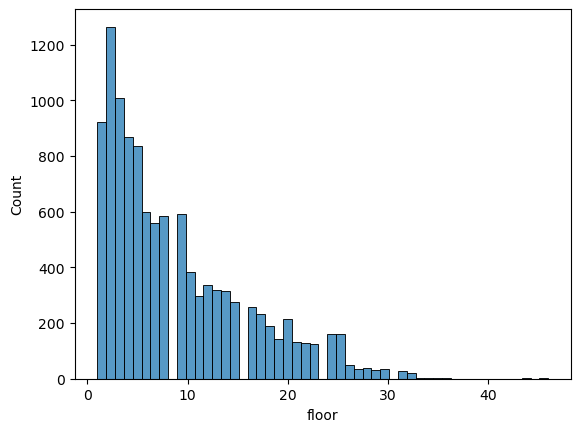

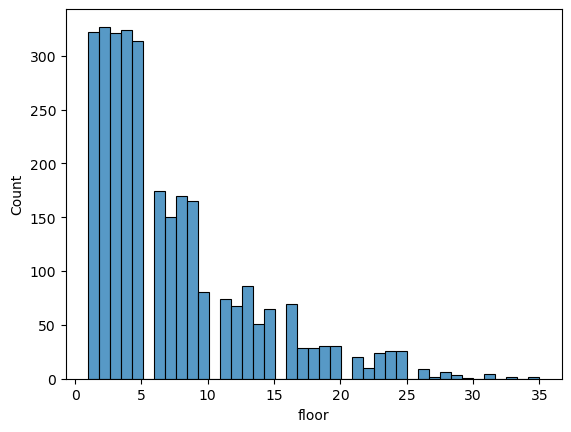

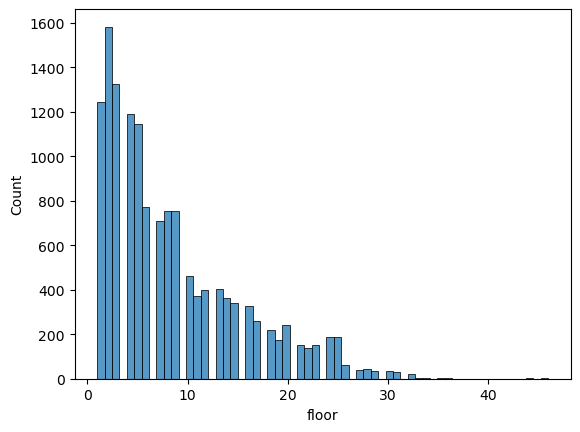

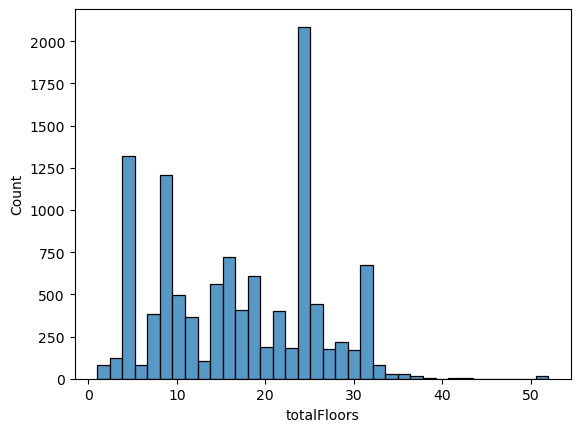

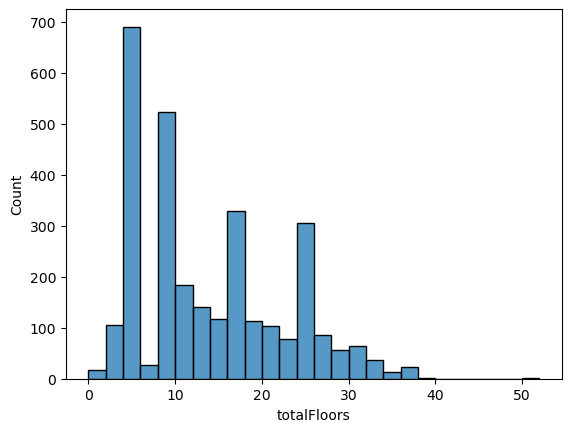

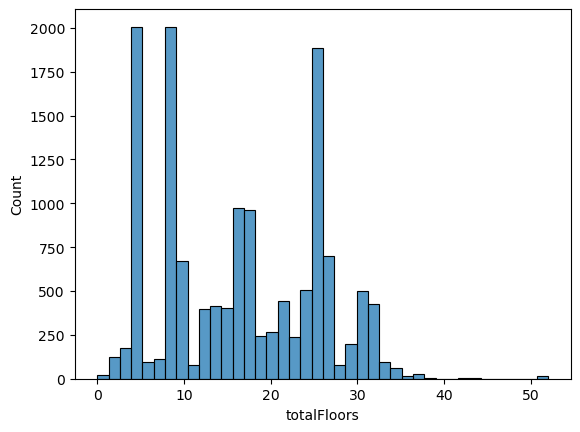

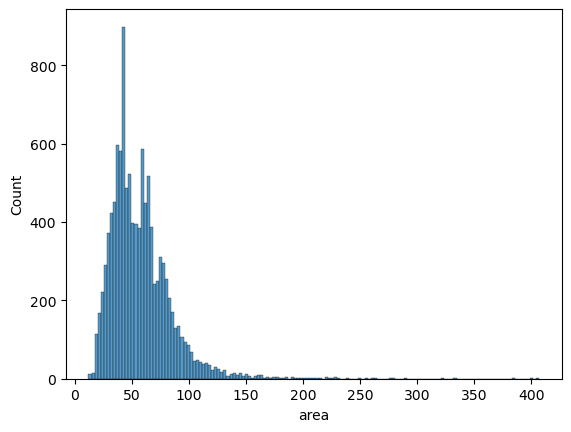

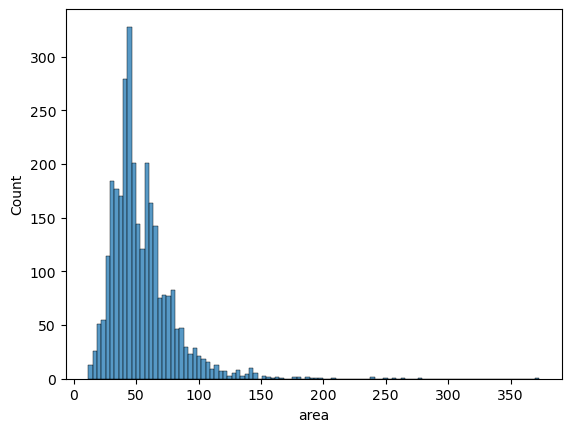

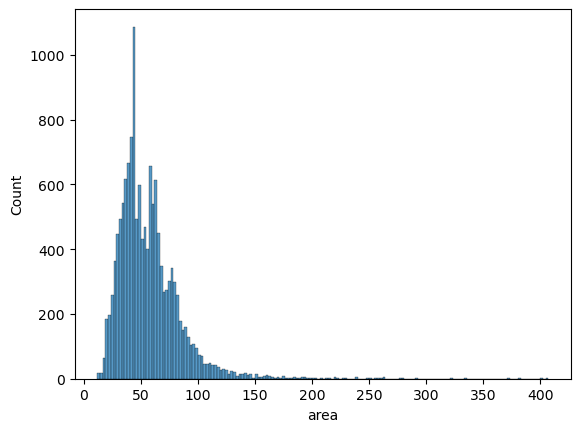

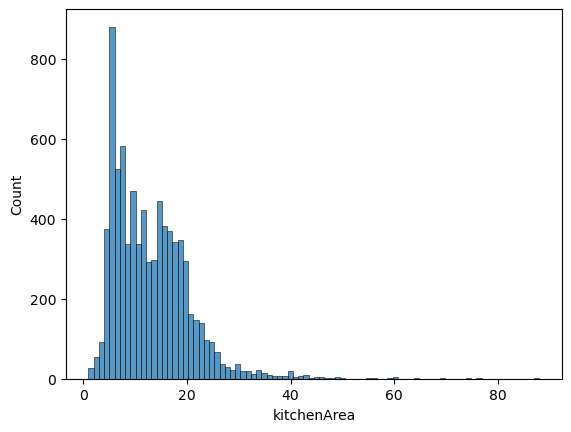

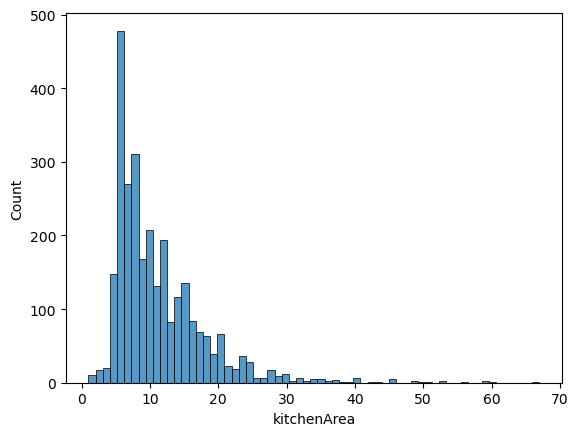

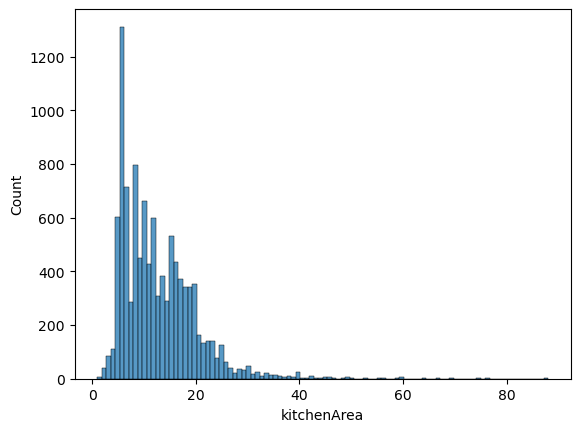

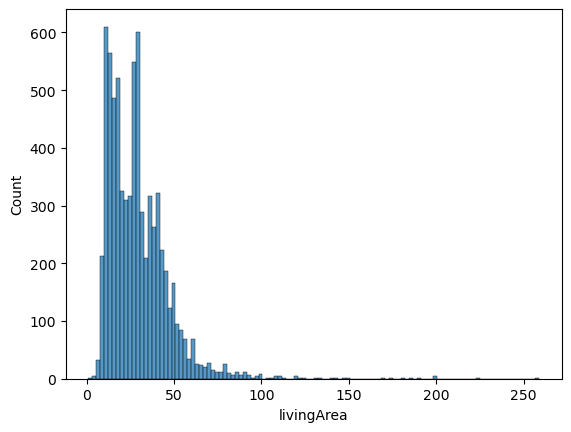

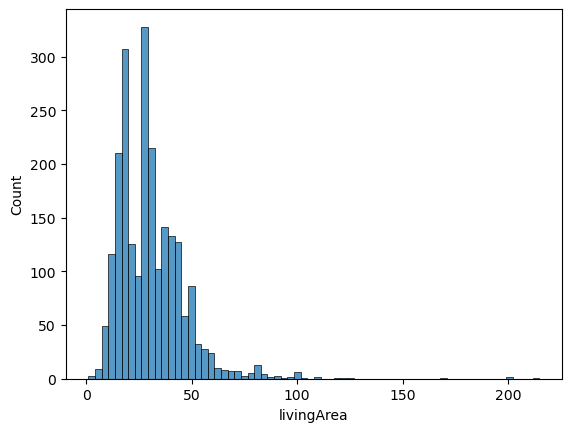

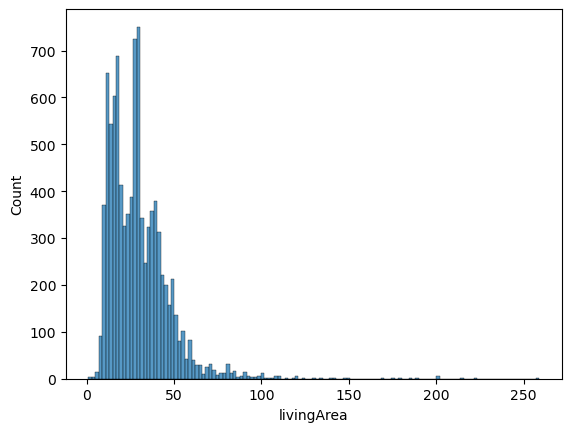

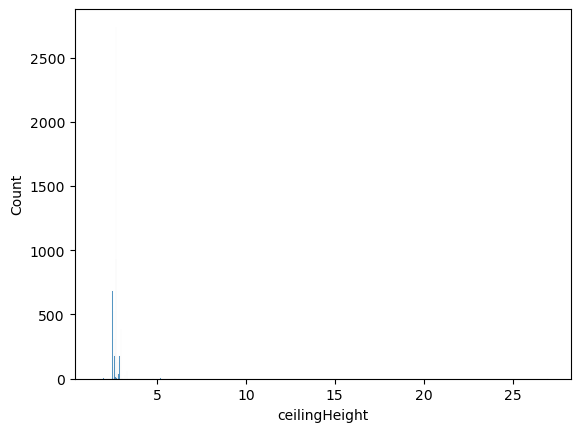

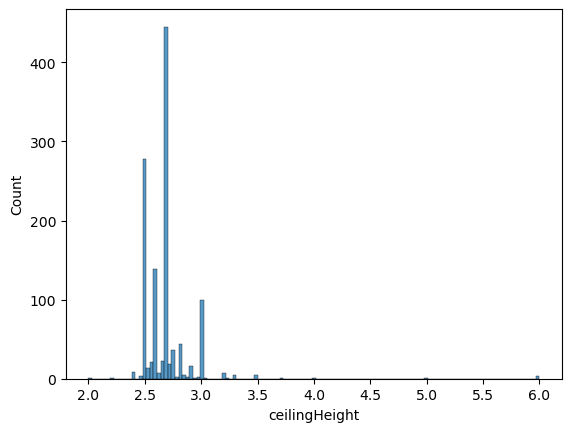

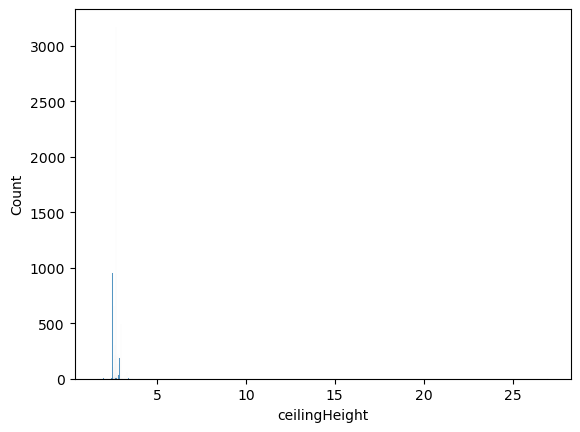

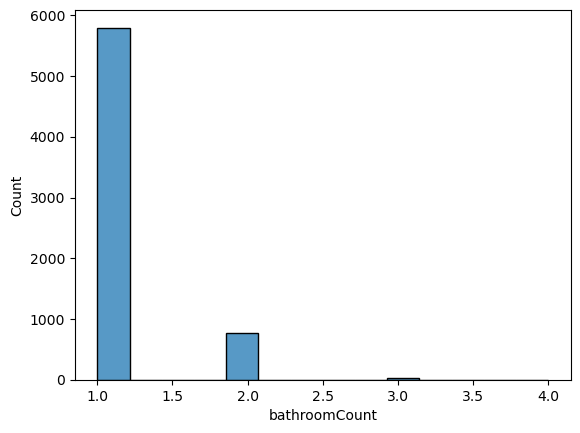

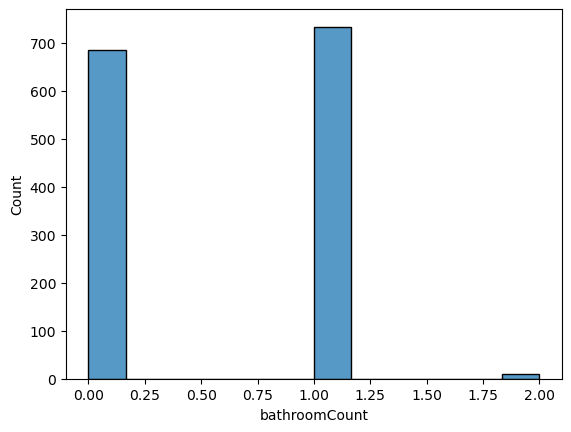

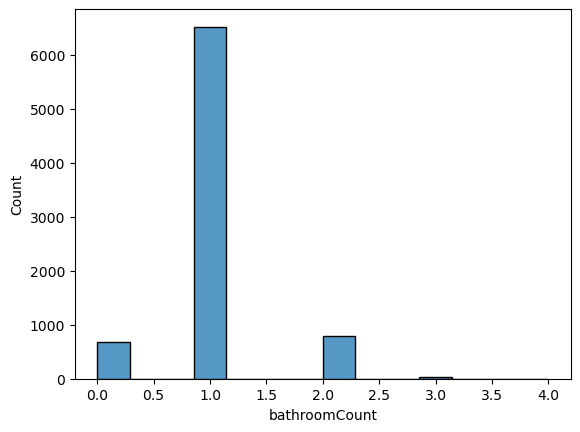

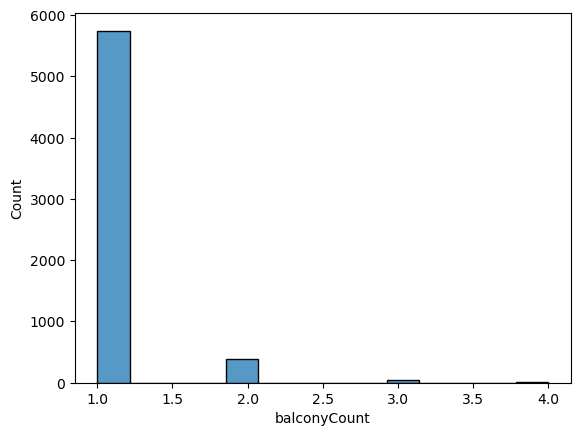

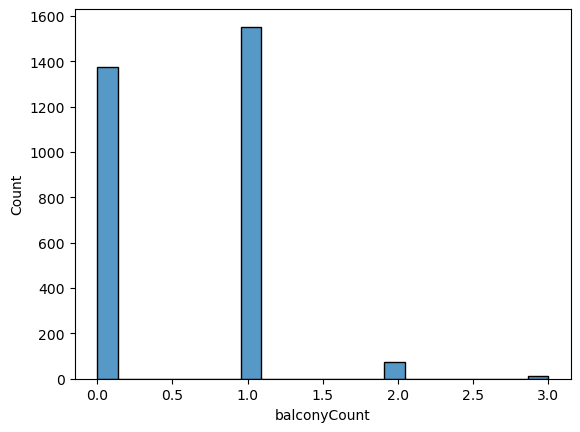

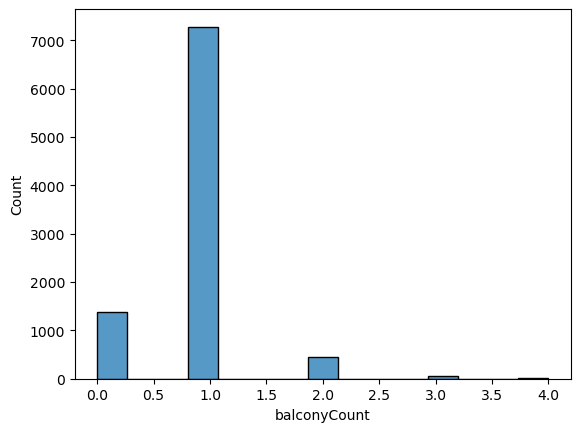

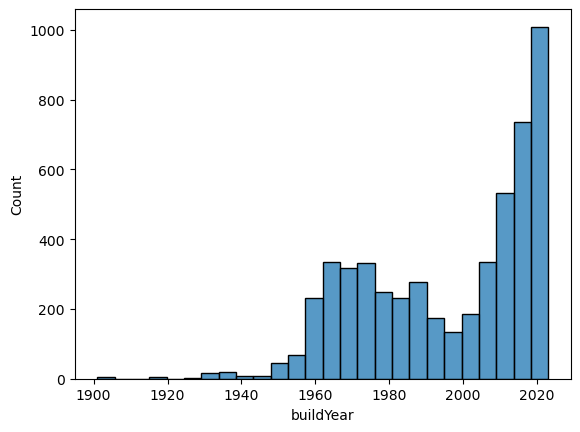

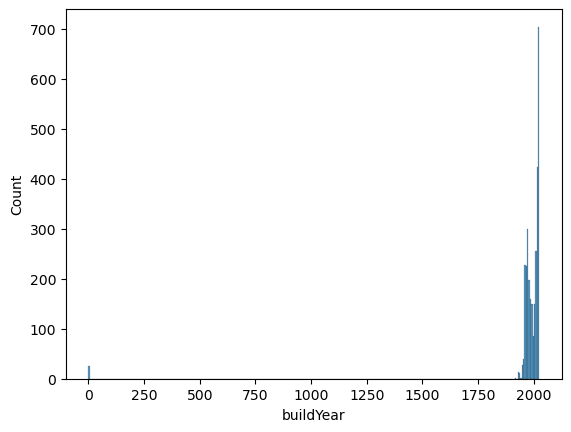

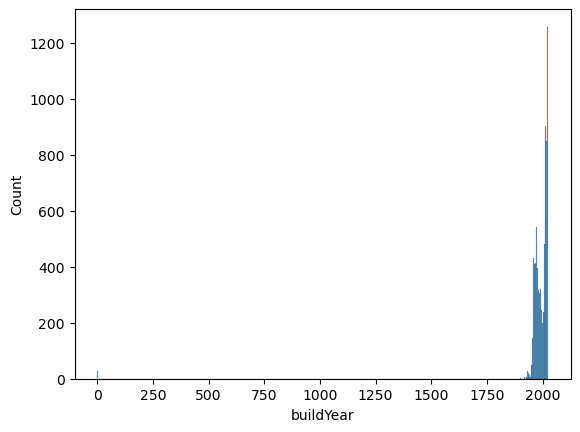

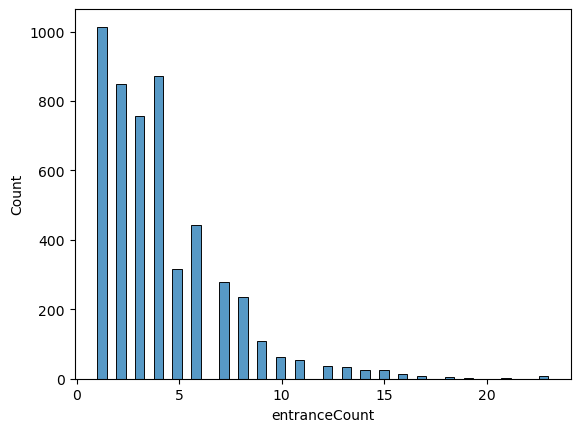

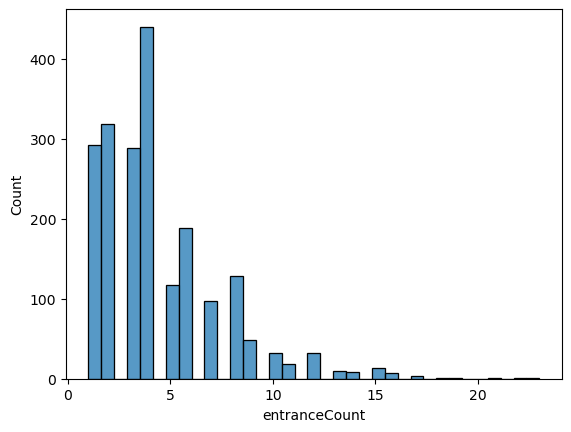

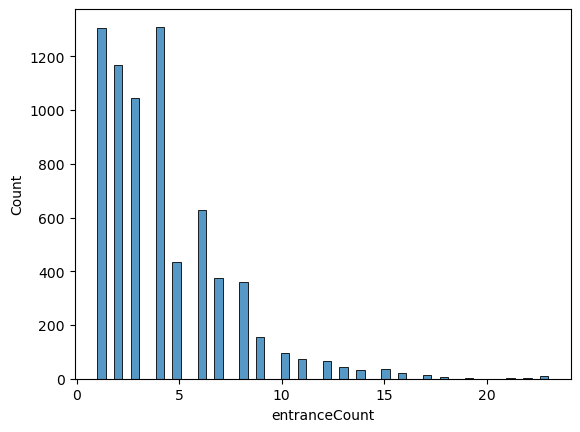

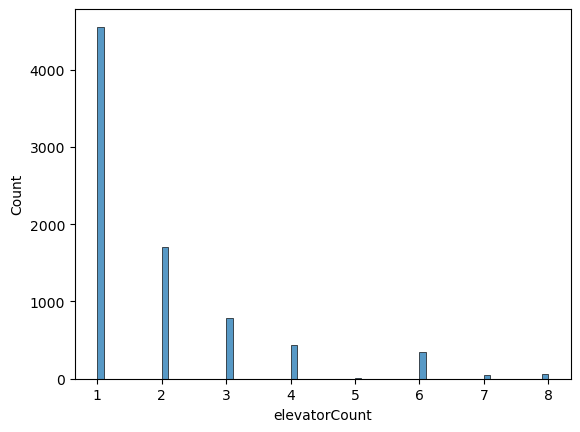

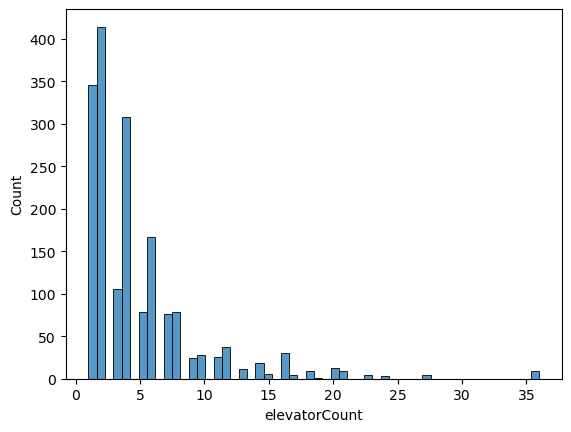

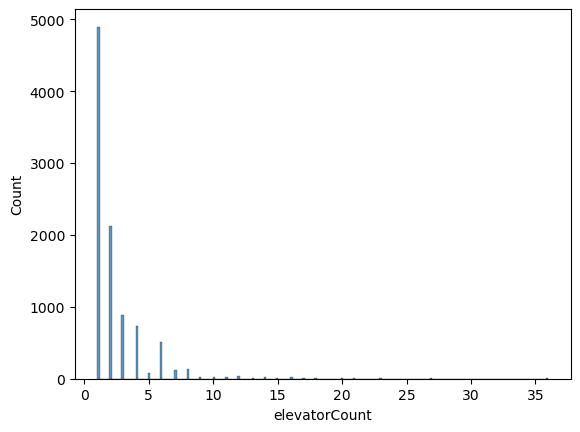

<Figure size 640x480 with 0 Axes>

In [320]:
for col in num_cols_cf:
    sns.histplot(data = merge_cian, x = col)
    plt.figure()
    sns.histplot(data = merge_domclick, x = col)
    plt.figure()
    sns.histplot(data = df_combined, x = col)
    plt.figure()

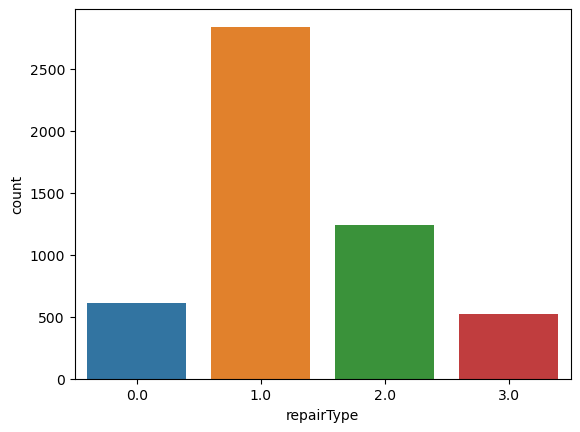

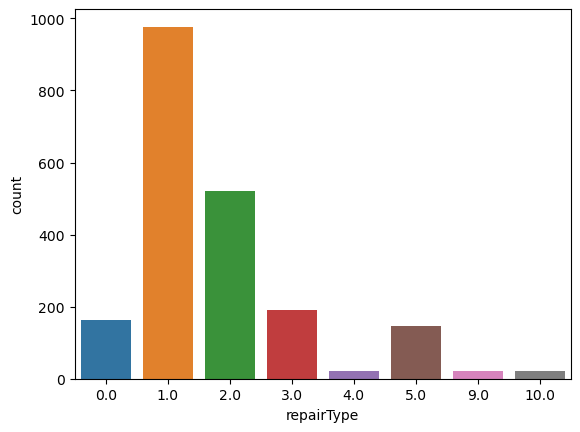

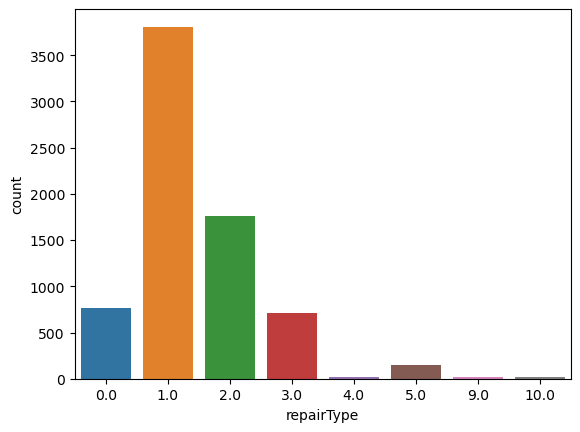

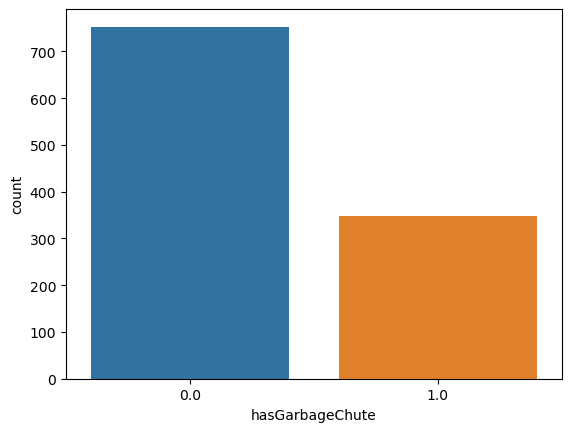

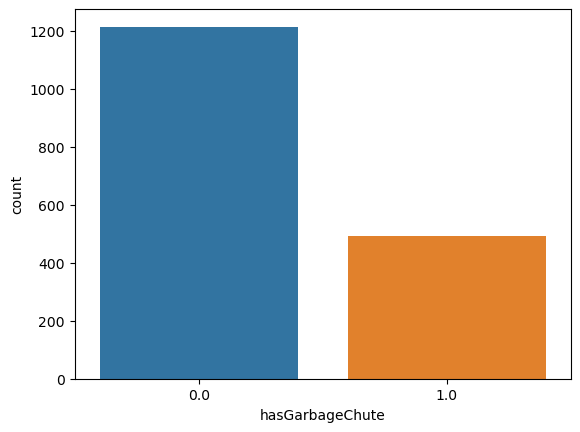

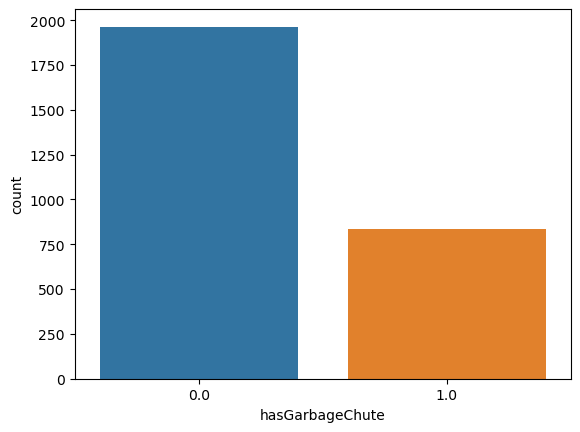

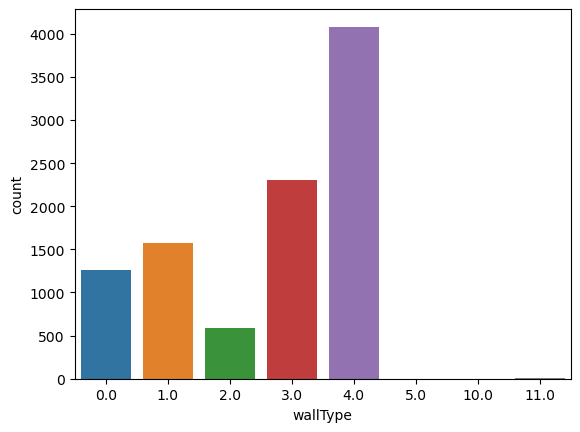

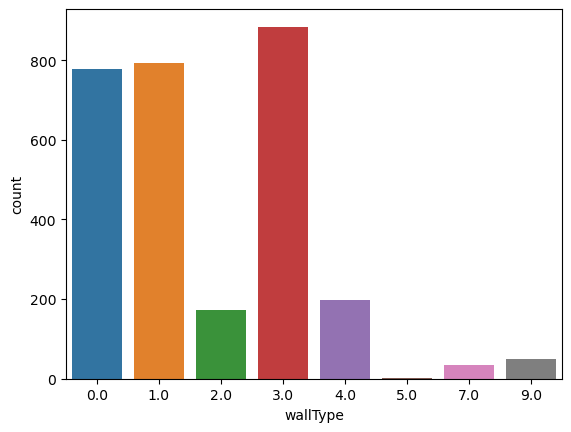

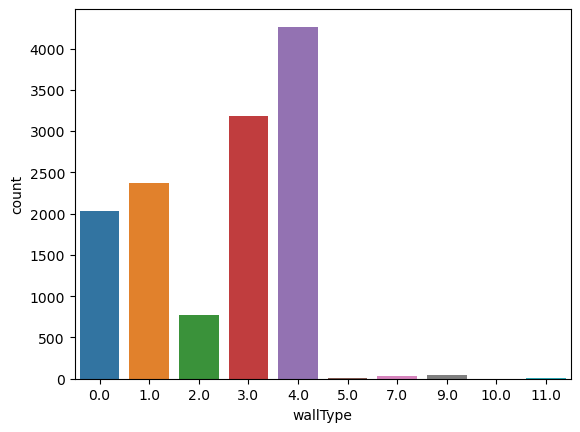

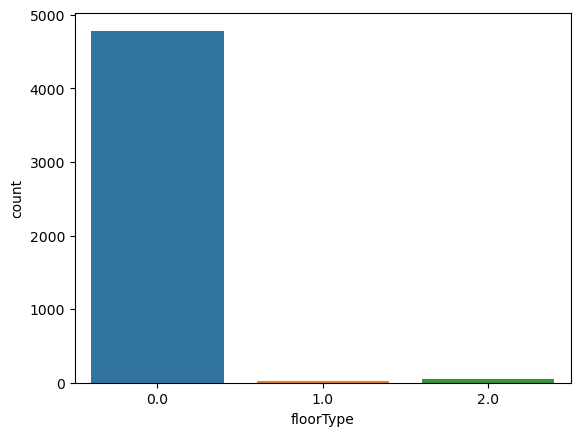

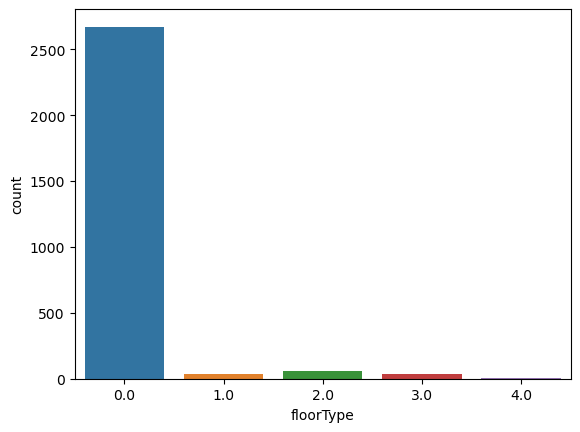

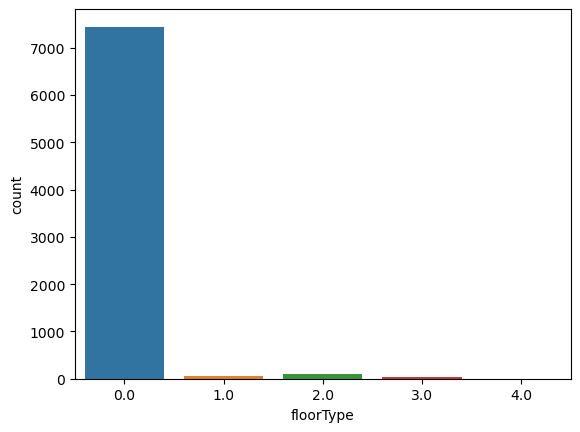

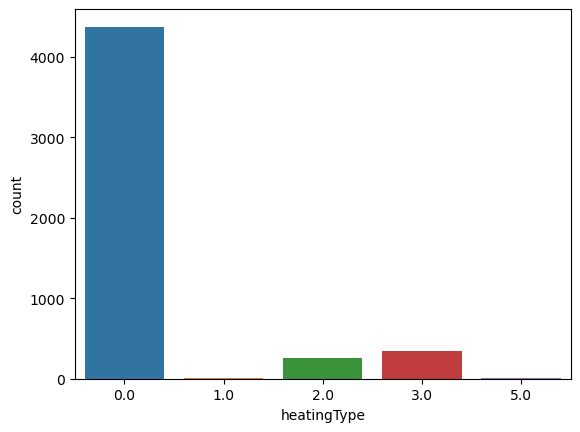

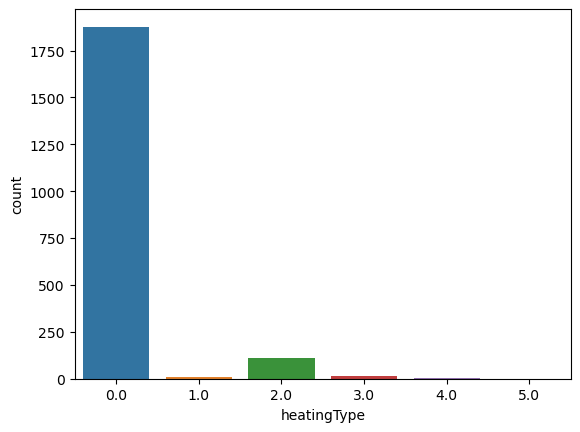

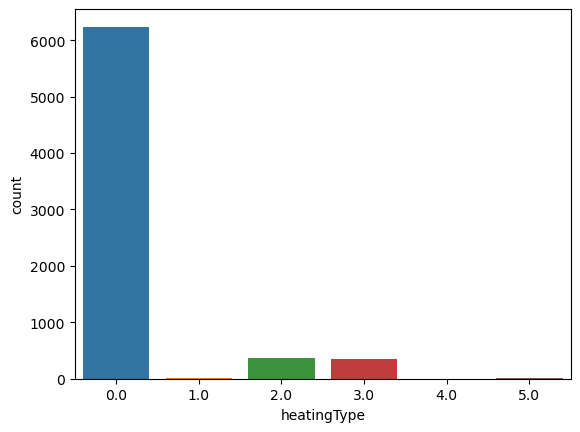

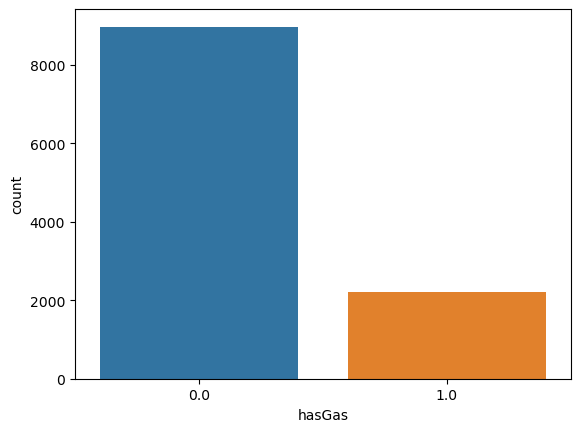

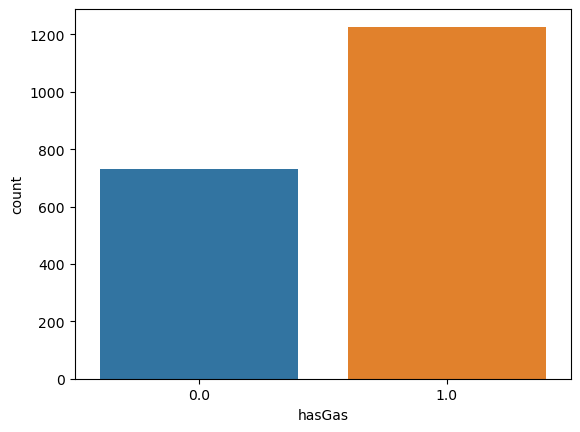

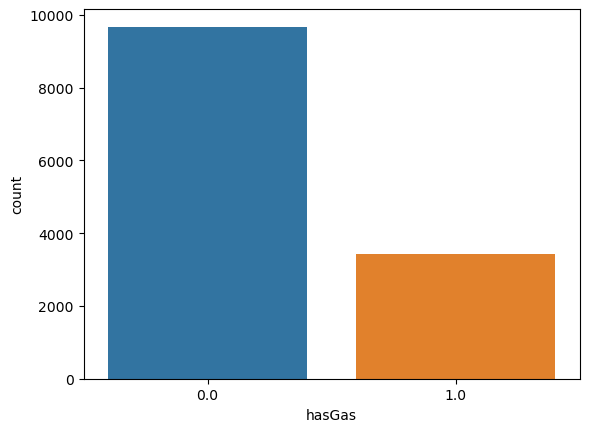

<Figure size 640x480 with 0 Axes>

In [321]:
for col in cat_cols_cf:
    sns.countplot(data = merge_cian, x = col)
    plt.figure()
    sns.countplot(data = merge_domclick, x = col)
    plt.figure()
    sns.countplot(data = df_combined, x = col)
    plt.figure()

# Заполнение пропусков

In [322]:
from miceforest import ImputationKernel

domclick_mice_kernel = ImputationKernel(data = df_domclick_prepared, save_all_iterations = True, random_state = 123)
domclick_mice_kernel.mice(10)
domclick_imputation = domclick_mice_kernel.complete_data()

In [323]:
domclick_imputation.info()
domclick_imputation.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3014 entries, 0 to 3013
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       3014 non-null   float64
 1   longitude                      3014 non-null   float64
 2   price                          3014 non-null   int64  
 3   house_floors                   3014 non-null   int64  
 4   house_buildYear                3014 non-null   float64
 5   house_ceilingHeight            3014 non-null   float64
 6   house_hasGarbageDisposer       3014 non-null   float64
 7   house_liftsFreight             3014 non-null   float64
 8   house_liftsPassenger           3014 non-null   float64
 9   house_wallType                 3014 non-null   float64
 10  house_areaNonResidential       3014 non-null   float64
 11  house_basementArea             3014 non-null   float64
 12  house_chuteCount               3014 non-null   f

,latitude,longitude,price,house_floors,house_buildYear,house_ceilingHeight,house_hasGarbageDisposer,house_liftsFreight,house_liftsPassenger,house_wallType,house_areaNonResidential,house_basementArea,house_chuteCount,house_coldWaterType,house_electricalEntriesCount,house_electricalType,house_elevatorsCount,house_energyEfficiency,house_entranceCount,house_fireFightingType,house_floorType,house_foundationType,house_heatingType,house_parkingSquare,house_sewerageCesspoolsVolume,house_sewerageType,house_ventilationType,objectInfo_rooms,objectInfo_area,objectInfo_kitchenArea,objectInfo_livingArea,objectInfo_floor,objectInfo_connectedBathrooms,objectInfo_separatedBathrooms,objectInfo_balconies,objectInfo_hasGas,objectInfo_renovation
0,56.80170,60.62653,6800000,5,1970.00000,2.58000,0.00000,0.00000,0.00000,1.00000,57.40000,1636.60000,5.00000,1.00000,2.00000,0.00000,8.00000,7.00000,8.00000,1.00000,0.00000,3.00000,0.00000,212.00000,0.00000,1.00000,2.00000,3,55.00000,7.00000,42.90000,2,1.00000,0.00000,1,1.00000,3.00000
1,56.78992,60.61735,4990000,16,2018.00000,2.70000,0.00000,0.00000,1.00000,3.00000,0.00000,0.00000,1.00000,1.00000,2.00000,0.00000,1.00000,7.00000,1.00000,1.00000,0.00000,3.00000,0.00000,15.00000,0.00000,1.00000,2.00000,0,58.00000,12.00000,37.00000,15,1.00000,1.00000,0,0.00000,2.00000
2,56.85625,60.60961,11800000,36,2022.00000,2.90000,0.00000,1.00000,3.00000,4.00000,10058.42000,1166.10000,1.00000,1.00000,6.00000,0.00000,2.00000,4.00000,1.00000,0.00000,0.00000,3.00000,2.00000,0.00000,0.00000,1.00000,2.00000,2,73.00000,12.00000,54.00000,5,0.00000,2.00000,1,0.00000,1.00000
3,56.81739,60.55833,5600000,9,1969.00000,2.50000,1.00000,1.00000,1.00000,0.00000,307.70000,1026.10000,1.00000,1.00000,2.00000,0.00000,4.00000,7.00000,4.00000,1.00000,0.00000,3.00000,0.00000,0.00000,0.00000,1.00000,1.00000,3,58.00000,6.00000,40.00000,4,0.00000,1.00000,0,1.00000,1.00000
4,56.88032,60.50678,3600000,4,1962.00000,2.20000,0.00000,0.00000,0.00000,1.00000,0.00000,443.50000,2.00000,1.00000,1.00000,0.00000,2.00000,7.00000,2.00000,1.00000,0.00000,3.00000,0.00000,72.00000,0.00000,1.00000,2.00000,2,42.60000,5.40000,28.50000,3,1.00000,0.00000,1,1.00000,2.00000


In [324]:
cian_mice_kernel = ImputationKernel(data = df_cian_prepared, save_all_iterations = True, random_state = 123)
cian_mice_kernel.mice(10)
cian_imputation = cian_mice_kernel.complete_data()

In [325]:
cian_imputation.info()
cian_imputation.head()

<class 'pandas.core.frame.DataFrame'>
Index: 11166 entries, 0 to 26679
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                11166 non-null  int64  
 1   price_for_metr       11166 non-null  int64  
 2   floor_object         11166 non-null  int64  
 3   total_floors         11166 non-null  int64  
 4   type_of_home         11166 non-null  float64
 5   square_home          11166 non-null  float64
 6   live_square          11166 non-null  float64
 7   kitchen_square       11166 non-null  float64
 8   height_ceiling       11166 non-null  float64
 9   bathroom             11166 non-null  float64
 10  balcony              11166 non-null  float64
 11  repair               11166 non-null  float64
 12  yer_home             11166 non-null  float64
 13  garbage_chute        11166 non-null  float64
 14  type_home            11166 non-null  float64
 15  type_of_overlap      11166 non-null  floa

,price,price_for_metr,floor_object,total_floors,type_of_home,square_home,live_square,kitchen_square,height_ceiling,bathroom,balcony,repair,yer_home,garbage_chute,type_home,type_of_overlap,entrances,heating,gas_supply,finishing,number_of_elevators,room_count
0,1290000,103200,1,5,0.00000,12.50000,13.00000,3.00000,2.70000,1.00000,1.00000,1.00000,1970.00000,0.00000,1.00000,0.00000,3.00000,0.00000,0.00000,4.00000,1.00000,1
2,1300000,33679,2,2,0.00000,38.60000,22.90000,5.00000,2.70000,1.00000,1.00000,1.00000,1974.00000,0.00000,2.00000,2.00000,1.00000,1.00000,1.00000,3.00000,2.00000,2
3,1300000,89041,1,5,0.00000,14.60000,5.40000,4.20000,2.50000,1.00000,1.00000,1.00000,1970.00000,0.00000,1.00000,0.00000,3.00000,0.00000,0.00000,3.00000,1.00000,0
4,1200000,15385,11,12,0.00000,78.00000,45.00000,8.50000,2.60000,1.00000,1.00000,0.00000,1989.00000,1.00000,1.00000,0.00000,8.00000,0.00000,1.00000,3.00000,2.00000,3
5,1300000,56522,2,3,0.00000,23.00000,18.20000,2.00000,2.70000,1.00000,1.00000,1.00000,1960.00000,0.00000,2.00000,1.00000,1.00000,0.00000,0.00000,3.00000,1.00000,0


In [326]:
combined_mice_kernel = ImputationKernel(data = df_combined, save_all_iterations = True, random_state = 123)
combined_mice_kernel.mice(10)
combined_imputation = combined_mice_kernel.complete_data()

In [327]:
combined_imputation.info()
combined_imputation.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14146 entries, 0 to 14145
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            14146 non-null  int64  
 1   room_count       14146 non-null  int64  
 2   floor            14146 non-null  int64  
 3   totalFloors      14146 non-null  int64  
 4   area             14146 non-null  float64
 5   kitchenArea      14146 non-null  float64
 6   livingArea       14146 non-null  float64
 7   ceilingHeight    14146 non-null  float64
 8   bathroomCount    14146 non-null  float64
 9   balconyCount     14146 non-null  float64
 10  repairType       14146 non-null  float64
 11  buildYear        14146 non-null  float64
 12  hasGarbageChute  14146 non-null  float64
 13  wallType         14146 non-null  float64
 14  floorType        14146 non-null  float64
 15  entranceCount    14146 non-null  float64
 16  heatingType      14146 non-null  float64
 17  hasGas      

,price,room_count,floor,totalFloors,area,kitchenArea,livingArea,ceilingHeight,bathroomCount,balconyCount,repairType,buildYear,hasGarbageChute,wallType,floorType,entranceCount,heatingType,hasGas,elevatorCount
0,6800000,3,2,5,55.00000,7.00000,36.40000,2.50000,1.00000,1.00000,3.00000,1970.00000,0.00000,1.00000,0.00000,8.00000,0.00000,1.00000,1.00000
1,4990000,0,15,16,58.00000,11.80000,27.00000,2.80000,1.00000,0.00000,2.00000,2018.00000,0.00000,3.00000,0.00000,2.00000,0.00000,0.00000,1.00000
2,11800000,2,5,36,73.00000,12.00000,54.00000,2.70000,2.00000,1.00000,0.00000,2022.00000,0.00000,4.00000,0.00000,2.00000,0.00000,0.00000,2.00000
3,5600000,3,4,9,58.00000,6.00000,40.00000,2.54000,1.00000,0.00000,1.00000,1969.00000,1.00000,0.00000,0.00000,4.00000,0.00000,1.00000,4.00000
4,3600000,2,3,4,42.60000,5.40000,28.50000,2.70000,1.00000,1.00000,2.00000,1962.00000,0.00000,1.00000,0.00000,2.00000,0.00000,1.00000,1.00000


In [328]:
combined_imputation['heatingType'].unique()

array([0., 2., 3., 1., 4., 5.])

In [329]:
combined_imputation['repairType'].unique()

array([ 3.,  2.,  0.,  1.,  9.,  5.,  4., 10.])

# Сравнение моделей машинного обучения

## Разбиение данных

In [330]:
X_domclick = domclick_imputation.drop(['price'], axis=1).values
Y_domclick = domclick_imputation['price'].values

test_size = 0.25
r_state = 123
X_train_domclick, X_test_domclick, y_train_domclick, y_test_domclick = train_test_split(X_domclick, Y_domclick, test_size=test_size, random_state=r_state)

In [331]:
X_cian = cian_imputation.drop(['price'], axis=1).values
Y_cian = cian_imputation['price'].values

test_size = 0.25
r_state = 123
X_train_cian, X_test_cian, y_train_cian, y_test_cian = train_test_split(X_cian, Y_cian, test_size=test_size, random_state=r_state)

In [332]:
X_combined = combined_imputation.drop(['price'], axis=1).values
Y_combined = combined_imputation['price'].values

test_size = 0.25
r_state = 123
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, Y_combined, test_size=test_size, random_state=r_state)

## Линейная регрессия

In [333]:
linear_regressor_domclick = LinearRegression()
linear_regressor_domclick.fit(X_train_domclick, y_train_domclick)
probs_domclick = linear_regressor_domclick.predict(X_test_domclick)
print('MSE: ', mean_squared_error(y_test_domclick, probs_domclick))
print('MAE: ', mean_absolute_error(y_test_domclick, probs_domclick))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_domclick, probs_domclick)))
print('R2: ', r2_score(y_test_domclick, probs_domclick))

MSE:  338847183901788.25
MAE:  2386192.841215859
RMSE:  18407802.256157257
R2:  -9.263498081460336


In [334]:
linear_regressor_cian = LinearRegression()
linear_regressor_cian.fit(X_train_cian, y_train_cian)
probs_cian = linear_regressor_cian.predict(X_test_cian)
print('MSE: ', mean_squared_error(y_test_cian, probs_cian))
print('MAE: ', mean_absolute_error(y_test_cian, probs_cian))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_cian, probs_cian)))
print('R2: ', r2_score(y_test_cian, probs_cian))

MSE:  2020631758626.9814
MAE:  815038.5235637425
RMSE:  1421489.2748898887
R2:  0.9301321413799503


In [335]:
linear_regressor_combined = LinearRegression()
linear_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = linear_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  8328080869419.994
MAE:  1670703.2078569357
RMSE:  2885841.449113238
R2:  0.7099783532684794


## Случайный лес

In [336]:
rf_regressor_domclick = RandomForestRegressor()
rf_regressor_domclick.fit(X_train_domclick, y_train_domclick)
probs_domclick = rf_regressor_domclick.predict(X_test_domclick)
print('MSE: ', mean_squared_error(y_test_domclick, probs_domclick))
print('MAE: ', mean_absolute_error(y_test_domclick, probs_domclick))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_domclick, probs_domclick)))
print('R2: ', r2_score(y_test_domclick, probs_domclick))

MSE:  4991847216532.127
MAE:  996591.4096153846
RMSE:  2234244.21595584
R2:  0.8487996454924936


In [337]:
rf_regressor_cian = RandomForestRegressor()
rf_regressor_cian.fit(X_train_cian, y_train_cian)
probs_cian = rf_regressor_cian.predict(X_test_cian)
print('MSE: ', mean_squared_error(y_test_cian, probs_cian))
print('MAE: ', mean_absolute_error(y_test_cian, probs_cian))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_cian, probs_cian)))
print('R2: ', r2_score(y_test_cian, probs_cian))

MSE:  606290598063.3724
MAE:  101478.68445916905
RMSE:  778646.6451885428
R2:  0.9790361476764372


In [338]:
rf_regressor_combined = RandomForestRegressor()
rf_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = rf_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  5199357644774.827
MAE:  1127966.7956695883
RMSE:  2280210.0001479746
R2:  0.8189347234102045


## Дерево решений

In [339]:
tree_regressor_domclick = DecisionTreeRegressor()
tree_regressor_domclick.fit(X_train_domclick, y_train_domclick)
probs_domclick = tree_regressor_domclick.predict(X_test_domclick)
print('MSE: ', mean_squared_error(y_test_domclick, probs_domclick))
print('MAE: ', mean_absolute_error(y_test_domclick, probs_domclick))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_domclick, probs_domclick)))
print('R2: ', r2_score(y_test_domclick, probs_domclick))

MSE:  7353206475082.711
MAE:  1319833.5490716181
RMSE:  2711679.640938935
R2:  0.777275349670702


In [340]:
tree_regressor_cian = DecisionTreeRegressor()
tree_regressor_cian.fit(X_train_cian, y_train_cian)
probs_cian = tree_regressor_cian.predict(X_test_cian)
print('MSE: ', mean_squared_error(y_test_cian, probs_cian))
print('MAE: ', mean_absolute_error(y_test_cian, probs_cian))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_cian, probs_cian)))
print('R2: ', r2_score(y_test_cian, probs_cian))

MSE:  2481857746355.276
MAE:  230768.68911174784
RMSE:  1575391.2994412773
R2:  0.9141842221388956


In [341]:
tree_regressor_combined = DecisionTreeRegressor()
tree_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = tree_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  11061438925381.854
MAE:  1553490.7189708792
RMSE:  3325874.159582989
R2:  0.614790396171692


## Метод k-ближайших соседей

In [342]:
knn_regressor_domclick = KNeighborsRegressor()
knn_regressor_domclick.fit(X_train_domclick, y_train_domclick)
probs_domclick = knn_regressor_domclick.predict(X_test_domclick)
print('MSE: ', mean_squared_error(y_test_domclick, probs_domclick))
print('MAE: ', mean_absolute_error(y_test_domclick, probs_domclick))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_domclick, probs_domclick)))
print('R2: ', r2_score(y_test_domclick, probs_domclick))

MSE:  21090489303885.5
MAE:  2256867.295755968
RMSE:  4592438.274368584
R2:  0.36118047665336916


In [343]:
knn_regressor_cian = KNeighborsRegressor()
knn_regressor_cian.fit(X_train_cian, y_train_cian)
probs_cian = knn_regressor_cian.predict(X_test_cian)
print('MSE: ', mean_squared_error(y_test_cian, probs_cian))
print('MAE: ', mean_absolute_error(y_test_cian, probs_cian))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_cian, probs_cian)))
print('R2: ', r2_score(y_test_cian, probs_cian))

MSE:  14038488795459.467
MAE:  2036289.84247851
RMSE:  3746797.13828484
R2:  0.514587877671093


In [344]:
knn_regressor_combined = KNeighborsRegressor()
knn_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = knn_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  7589341782793.332
MAE:  1389337.7910093297
RMSE:  2754876.001346219
R2:  0.735704607584178


## Перцептрон

In [345]:
nn_regressor_domclick = MLPRegressor()
nn_regressor_domclick.fit(X_train_domclick, y_train_domclick)
probs_domclick = nn_regressor_domclick.predict(X_test_domclick)
print('MSE: ', mean_squared_error(y_test_domclick, probs_domclick))
print('MAE: ', mean_absolute_error(y_test_domclick, probs_domclick))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_domclick, probs_domclick)))
print('R2: ', r2_score(y_test_domclick, probs_domclick))

MSE:  38733789980839.32
MAE:  3834586.2301058574
RMSE:  6223647.642728444
R2:  -0.17322556610432516


C:\Users\shadee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [346]:
nn_regressor_cian = MLPRegressor()
nn_regressor_cian.fit(X_train_cian, y_train_cian)
probs_cian = nn_regressor_cian.predict(X_test_cian)
print('MSE: ', mean_squared_error(y_test_cian, probs_cian))
print('MAE: ', mean_absolute_error(y_test_cian, probs_cian))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_cian, probs_cian)))
print('R2: ', r2_score(y_test_cian, probs_cian))

MSE:  19390727532049.426
MAE:  2803351.6411333755
RMSE:  4403490.3806014415
R2:  0.3295222625473756


C:\Users\shadee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [347]:
nn_regressor_combined = MLPRegressor()
nn_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = nn_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  26268398928770.04
MAE:  3039513.476191197
RMSE:  5125270.620052178
R2:  0.08521489719239717


C:\Users\shadee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## XGBoost

In [348]:
xgb_regressor_domclick = XGBRegressor()
xgb_regressor_domclick.fit(X_train_domclick, y_train_domclick)
probs_domclick = xgb_regressor_domclick.predict(X_test_domclick)
print('MSE: ', mean_squared_error(y_test_domclick, probs_domclick))
print('MAE: ', mean_absolute_error(y_test_domclick, probs_domclick))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_domclick, probs_domclick)))
print('R2: ', r2_score(y_test_domclick, probs_domclick))

MSE:  3663142062714.9756
MAE:  885049.7826591512
RMSE:  1913933.6620465652
R2:  0.8890454065461886


In [349]:
xgb_regressor_cian = XGBRegressor()
xgb_regressor_cian.fit(X_train_cian, y_train_cian)
probs_cian = xgb_regressor_cian.predict(X_test_cian)
print('MSE: ', mean_squared_error(y_test_cian, probs_cian))
print('MAE: ', mean_absolute_error(y_test_cian, probs_cian))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_cian, probs_cian)))
print('R2: ', r2_score(y_test_cian, probs_cian))

MSE:  171377218637.6992
MAE:  139335.60977793697
RMSE:  413977.3165738664
R2:  0.994074249683865


In [350]:
xgb_regressor_combined = XGBRegressor()
xgb_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = xgb_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  4603657708199.83
MAE:  1149482.9230986713
RMSE:  2145613.5971324914
R2:  0.8396797040692809


# Сохранить модель

In [351]:
combined_imputation.to_csv('datasets_18features/combined_ekaterinburg_18feature.csv', index=False)

In [352]:
import pickle

rf_pkl_file = "models_18features/rf_model_ekaterinburg_18features.pkl"
xgboost_pkl_file = "models_18features/xgboost_model_ekaterinburg_18features.pkl"

with open(rf_pkl_file, 'wb') as file1:  
    pickle.dump(rf_regressor_combined, file1)

with open(xgboost_pkl_file, 'wb') as file2:  
    pickle.dump(xgb_regressor_combined, file2)

In [353]:
X_combined = combined_imputation.drop(['price', 'hasGarbageChute', 'balconyCount', 'elevatorCount', 'hasGas', 'bathroomCount', 
                                       'entranceCount', 'wallType', 'floorType'], axis=1).values
Y_combined = combined_imputation['price'].values

test_size = 0.25
r_state = 123
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, Y_combined, test_size=test_size, random_state=r_state)

In [354]:
rf_regressor_combined = RandomForestRegressor()
rf_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = rf_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  5126636549583.378
MAE:  1129124.5104633467
RMSE:  2264207.70901951
R2:  0.8214672026344381


In [355]:
xgb_regressor_combined = XGBRegressor()
xgb_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = xgb_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  4994248199017.801
MAE:  1182716.0008128358
RMSE:  2234781.4656063803
R2:  0.8260775670198374


In [356]:
combined_imputation10 = combined_imputation.drop(['hasGarbageChute', 'balconyCount', 'elevatorCount', 'hasGas', 'bathroomCount', 
                                       'entranceCount', 'wallType', 'floorType'], axis=1)
combined_imputation10.to_csv('datasets_10features/combined_ekaterinburg_10feature.csv', index=False)

In [357]:
rf_pkl_file = "models_10features/rf_model_ekaterinburg_10features.pkl"
xgboost_pkl_file = "models_10features/xgboost_model_ekaterinburg_10features.pkl"

with open(rf_pkl_file, 'wb') as file1:  
    pickle.dump(rf_regressor_combined, file1)

with open(xgboost_pkl_file, 'wb') as file2:  
    pickle.dump(xgb_regressor_combined, file2)

# One Hot Encoding

In [358]:
combined_ohe = pd.get_dummies(combined_imputation, columns = cat_cols_cf)
combined_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14146 entries, 0 to 14145
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                14146 non-null  int64  
 1   room_count           14146 non-null  int64  
 2   floor                14146 non-null  int64  
 3   totalFloors          14146 non-null  int64  
 4   area                 14146 non-null  float64
 5   kitchenArea          14146 non-null  float64
 6   livingArea           14146 non-null  float64
 7   ceilingHeight        14146 non-null  float64
 8   bathroomCount        14146 non-null  float64
 9   balconyCount         14146 non-null  float64
 10  buildYear            14146 non-null  float64
 11  entranceCount        14146 non-null  float64
 12  elevatorCount        14146 non-null  float64
 13  repairType_0.0       14146 non-null  bool   
 14  repairType_1.0       14146 non-null  bool   
 15  repairType_2.0       14146 non-null 

In [359]:
combined_ohe.to_csv('datasets_18features_ohe/combined_ekaterinburg_18feature_ohe.csv', index=False)

In [360]:
X_combined = combined_ohe.drop(['price'], axis=1).values
Y_combined = combined_ohe['price'].values

test_size = 0.25
r_state = 123
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, Y_combined, test_size=test_size, random_state=r_state)

In [361]:
rf_regressor_combined = RandomForestRegressor()
rf_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = rf_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  5099016212401.246
MAE:  1126205.974454811
RMSE:  2258100.1333867474
R2:  0.8224290683749901


In [362]:
xgb_regressor_combined = XGBRegressor()
xgb_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = xgb_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  5218947420506.413
MAE:  1149959.1513994911
RMSE:  2284501.569381473
R2:  0.8182525183372882


n_estimators = [int(x) for x in np.linspace(start = 200, stop = 500, num = 10)]

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

max_features = ['auto', 'sqrt']

min_samples_split = [2, 5, 10, 15, 20, 25, 30]

min_samples_leaf = [1, 2, 4, 6, 8, 10, 15, 20, 25, 30]
params = {'n_estimators': n_estimators,
           'max_features': max_features,
           'max_depth': max_depth,
           'min_samples_split': min_samples_split,
           'min_samples_leaf': min_samples_leaf}
model = RandomizedSearchCV(estimator = rf_regressor_combined, 
                   param_distributions = params, 
                   cv = 5, n_iter = 500)
                   
model.fit(X_train_combined, y_train_combined)

In [363]:
rf_pkl_file = "models_18features_ohe/rf_model_ekaterinburg_18features_ohe.pkl"
xgboost_pkl_file = "models_18features_ohe/xgboost_model_ekaterinburg_18features_ohe.pkl"

with open(rf_pkl_file, 'wb') as file1:  
    pickle.dump(rf_regressor_combined, file1)

with open(xgboost_pkl_file, 'wb') as file2:  
    pickle.dump(xgb_regressor_combined, file2)

In [364]:
cat_cols_ohe = [ele for ele in cat_cols_cf if ele not in ('hasGarbageChute', 'wallType', 'floorType', 'hasGas')]
combined_ohe_dropped = pd.get_dummies(combined_imputation10, columns = cat_cols_ohe)
combined_ohe_dropped.to_csv('datasets_10features_ohe/combined_ekaterinburg_10feature_ohe.csv', index=False)
combined_ohe_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14146 entries, 0 to 14145
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            14146 non-null  int64  
 1   room_count       14146 non-null  int64  
 2   floor            14146 non-null  int64  
 3   totalFloors      14146 non-null  int64  
 4   area             14146 non-null  float64
 5   kitchenArea      14146 non-null  float64
 6   livingArea       14146 non-null  float64
 7   ceilingHeight    14146 non-null  float64
 8   buildYear        14146 non-null  float64
 9   repairType_0.0   14146 non-null  bool   
 10  repairType_1.0   14146 non-null  bool   
 11  repairType_2.0   14146 non-null  bool   
 12  repairType_3.0   14146 non-null  bool   
 13  repairType_4.0   14146 non-null  bool   
 14  repairType_5.0   14146 non-null  bool   
 15  repairType_9.0   14146 non-null  bool   
 16  repairType_10.0  14146 non-null  bool   
 17  heatingType_

In [365]:
X_combined = combined_ohe_dropped.drop(['price'], axis=1).values
Y_combined = combined_ohe_dropped['price'].values

test_size = 0.25
r_state = 123
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, Y_combined, test_size=test_size, random_state=r_state)

In [366]:
rf_regressor_combined = RandomForestRegressor()
rf_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = rf_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  5025206005216.601
MAE:  1124609.7280568683
RMSE:  2241697.1261115093
R2:  0.8249994754314212


In [367]:
xgb_regressor_combined = XGBRegressor()
xgb_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = xgb_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  5020787271482.838
MAE:  1193360.745653096
RMSE:  2240711.331582638
R2:  0.8251533558336444


In [368]:
rf_pkl_file = "models_10features_ohe/rf_model_ekaterinburg_10features_ohe.pkl"
xgboost_pkl_file = "models_10features_ohe/xgboost_model_ekaterinburg_10features_ohe.pkl"

with open(rf_pkl_file, 'wb') as file1:  
    pickle.dump(rf_regressor_combined, file1)

with open(xgboost_pkl_file, 'wb') as file2:  
    pickle.dump(xgb_regressor_combined, file2)